# Dependencias

In [1]:
print("git checker")

git checker


In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#datesrun 
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
##from matplotlib.colors import ListedColormap, LinearSegmentedColormap

##import matplotlib.image as mpimg

In [3]:
import os
directory = os.getcwd() + "/"
directory 

'/home/runner/work/vacunacion/vacunacion/'

# Variables y Funciones


In [4]:
#VARIABLES

plt.style.use("default")
plt.style.use("Solarize_Light2")

ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']

color_vac_parcial1 = 	"orange"
color_vac_parcial2 = color_vac_parcial1
color_vac_completa1 = "green"
color_vac_completa2 = color_vac_completa1
color_total_dosis1 = "#38deaa"
color_total_dosis2 = color_total_dosis1

color3 = "m"
color4 = "#7537be"

color_terceras = "blue"

background_color1 = "black"
background_color2 = "black"

atribucion = "Datos del Ministerio de Salud (Unidos Contra el Covid) vía @mauforonda. Visualización de BoliGráfica"

In [5]:
def annotate_bar(series, axis, text_color="black", fontsize=12, x_offset=0, y_offset=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  for p in axs[axis].patches:
    axs[axis].annotate(start_text + str(p.get_width()) + end_text,
        xy = (p.get_width() + x_offset, p.get_y() + y_offset),
        fontsize = fontsize,
         color = text_color,
          bbox={
            'edgecolor': edgecolor,
            'facecolor': facecolor, 
            'alpha': alpha}
           )


def annotate_last_flat(df, column_index, axis = 0, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5,start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index].round(0).astype(int)) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

def annotate_last_nonflat(df, column_index, axis, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index]) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

# Revisar Base de Datos (bolcuantas, mauforonda, edu MF2)

## habitantes

In [6]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[ordenado]
# habitantes = habitantes.rename(index={:"habitantes"})

#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

#habitantes.to_csv(directory + "habitantes.csv")
habitantes

Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

In [7]:
pob_vacunable = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-pruebas/master/data/vaccine.target.population.csv", index_col=0)
pob_vacunable.insert(4,"total vacunable", pob_vacunable.sum(axis=1))
pob_vac = pd.DataFrame(pob_vacunable.iloc[:,-1]).T
pob_vac.insert(0,"Bolivia", pob_vacunable.iloc[:,-1].sum())
pob_vac = pob_vac.rename(columns={"Potosi":"Potosí"})
pob_vac = pob_vac[ordenado]
pob_vac

dept             Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  \
total vacunable  7180432  1928771     1273520     1988115  345890  531057   

dept             Chuquisaca  Tarija    Beni  Pando  
total vacunable      391718  366070  268459  86832

In [8]:
porc_vacunable = pob_vac.div(habitantes.iloc[0])*100
porc_vacunable = porc_vacunable.round(1)
porc_vacunable =porc_vacunable.rename(index={"total vacunable":"porcentaje vacunable"})
porc_vacunable

dept                  Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
porcentaje vacunable     61.8    65.9        62.8        59.0   64.3    58.9   

dept                  Chuquisaca  Tarija  Beni  Pando  
porcentaje vacunable        61.5    62.8  55.9   56.4

## importar BolCuantas

In [9]:
url1_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=0&single=true&output=csv"
url2_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=2002090716&single=true&output=csv"

In [10]:
primeras_BC = pd.read_csv(url1_BC, index_col=0)
primeras_BC = primeras_BC[ordenado]#.fillna(0)
primeras_BC.index = pd.to_datetime(primeras_BC.index, format= "%Y-%m-%d")
primeras_BC

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
fecha                                                                         
2021-02-03     3560.0     361.0       687.0      1264.0     106.0     203.0   
2021-02-04     5172.0    1030.0      1044.0      1393.0     195.0     293.0   
2021-02-05     7430.0    1783.0      1369.0      1638.0     300.0     396.0   
2021-02-06     7636.0    1859.0      1369.0      1638.0     412.0     396.0   
2021-02-07     7752.0    1859.0      1369.0      1638.0     499.0     396.0   
...               ...       ...         ...         ...       ...       ...   
2021-08-23  3061404.0  710951.0    553116.0    944214.0  155518.0  143743.0   
2021-08-24  3078404.0  715041.0    557033.0    949602.0  156794.0  144517.0   
2021-08-25  3094427.0  718753.0    560242.0    954638.0  157792.0  145061.0   
2021-08-26  3151833.0  731838.0    570579.0    977697.0  160137.0  146444.0   
2021-08-27  3172621.0  736367.0    574389.0    985890.0  161156.0  147268.0   

            Chuquisaca    Tarija      Beni    Pando  
fecha                                                
2021-02-03       303.0     200.0      48.0    388.0  
2021-02-04       304.0     362.0      63.0    488.0  
2021-02-05       529.0     711.0     154.0    550.0  
2021-02-06       530.0     712.0     170.0    550.0  
2021-02-07       530.0     712.0     199.0    550.0  
...                ...       ...       ...      ...  
2021-08-23    181630.0  213071.0  115995.0  43166.0  
2021-08-24    182091.0  213309.0  116728.0  43289.0  
2021-08-25    182492.0  214654.0  117402.0  43393.0  
2021-08-26    184609.0  218374.0  118636.0  43519.0  
2021-08-27    185239.0  219286.0  119397.0  43629.0  

[206 rows x 10 columns]

In [11]:
segundas_BC = pd.read_csv(url2_BC, index_col=0)
segundas_BC = segundas_BC[ordenado]#.fillna(0)
segundas_BC.index = pd.to_datetime(segundas_BC.index, format= "%Y-%m-%d") 

segundas_BC

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
fecha                                                                         
2021-02-03        NaN       NaN         NaN         NaN       NaN       NaN   
2021-02-04        NaN       NaN         NaN         NaN       NaN       NaN   
2021-02-05        NaN       NaN         NaN         NaN       NaN       NaN   
2021-02-06        NaN       NaN         NaN         NaN       NaN       NaN   
2021-02-07        NaN       NaN         NaN         NaN       NaN       NaN   
...               ...       ...         ...         ...       ...       ...   
2021-08-23  2328228.0  548842.0    449441.0    742775.0  114896.0   98217.0   
2021-08-24  2401767.0  564750.0    459632.0    767214.0  120276.0  102685.0   
2021-08-25  2480500.0  581474.0    480157.0    788849.0  123711.0  105705.0   
2021-08-26  2522944.0  592702.0    486908.0    798632.0  125508.0  109899.0   
2021-08-27  2600349.0  610148.0    488994.0    805067.0  129412.0  144460.0   

            Chuquisaca    Tarija     Beni    Pando  
fecha                                               
2021-02-03         NaN       NaN      NaN      NaN  
2021-02-04         NaN       NaN      NaN      NaN  
2021-02-05         NaN       NaN      NaN      NaN  
2021-02-06         NaN       NaN      NaN      NaN  
2021-02-07         NaN       NaN      NaN      NaN  
...                ...       ...      ...      ...  
2021-08-23    131504.0  160958.0  55601.0  25994.0  
2021-08-24    136360.0  166393.0  58130.0  26327.0  
2021-08-25    141771.0  171642.0  60189.0  27002.0  
2021-08-26    144978.0  174785.0  61966.0  27566.0  
2021-08-27    149876.0  180762.0  63519.0  28111.0  

[206 rows x 10 columns]

## importar mauforonda


In [12]:
url1_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/primera.csv"
url2_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/segunda.csv"

In [13]:
primeras_MF = pd.read_csv(url1_MF, index_col=0)
primeras_MF = primeras_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
primeras_MF = primeras_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
#primeras_MF.index = pd.to_datetime(primeras_MF.index) 

primeras_MF

Bolivia    La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
fecha                                                                         
2021-02-03     3560.0     361.0       687.0      1264.0     106.0     203.0   
2021-02-04     5172.0    1030.0      1044.0      1393.0     195.0     293.0   
2021-02-05     7430.0    1783.0      1369.0      1638.0     300.0     396.0   
2021-02-06     7636.0    1859.0      1369.0      1638.0     412.0     396.0   
2021-02-07     7752.0    1859.0      1369.0      1638.0     499.0     396.0   
...               ...       ...         ...         ...       ...       ...   
2021-07-15  2528672.0  604986.0    453988.0    757929.0  128125.0  122700.0   
2021-07-16  2568957.0  605422.0    461793.0    778170.0  130128.0  124668.0   
2021-07-17  2574283.0  606804.0    465406.0    773871.0  130582.0  125419.0   
2021-07-18  2598991.0  617441.0    469941.0    780044.0  130797.0  126157.0   
2021-07-19  2638918.0  627083.0    476690.0    793085.0  132690.0  128056.0   

            Chuquisaca    Tarija      Beni    Pando  
fecha                                                
2021-02-03       303.0     200.0      48.0    388.0  
2021-02-04       304.0     362.0      63.0    488.0  
2021-02-05       529.0     711.0     154.0    550.0  
2021-02-06       530.0     712.0     170.0    550.0  
2021-02-07       530.0     712.0     199.0    550.0  
...                ...       ...       ...      ...  
2021-07-15    150124.0  169804.0  100446.0  40570.0  
2021-07-16    153351.0  173189.0  101448.0  40788.0  
2021-07-17    154925.0  174760.0  101645.0  40871.0  
2021-07-18    155670.0  176257.0  101800.0  40884.0  
2021-07-19    158466.0  179166.0  102717.0  40965.0  

[167 rows x 10 columns]

In [14]:
segundas_MF = pd.read_csv(url2_MF, index_col=0)
segundas_MF = segundas_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
segundas_MF = segundas_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
#segundas_MF.index = pd.to_datetime(segundas_MF.index) 


segundas_MF

Bolivia    La Paz  Cochabamba  Santa Cruz    Oruro   Potosí  \
fecha                                                                      
2021-02-03       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-04       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-05       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-06       0.0       0.0         0.0         0.0      0.0      0.0   
2021-02-07       0.0       0.0         0.0         0.0      0.0      0.0   
...              ...       ...         ...         ...      ...      ...   
2021-07-15  866647.0  217837.0    171603.0    230214.0  48864.0  40441.0   
2021-07-16  895479.0  218058.0    178364.0    243481.0  50393.0  41158.0   
2021-07-17  917488.0  220090.0    178841.0    258928.0  51584.0  41395.0   
2021-07-18  929229.0  221004.0    179066.0    268588.0  51649.0  41682.0   
2021-07-19  980288.0  232590.0    185272.0    293221.0  53101.0  42885.0   

            Chuquisaca   Tarija     Beni    Pando  
fecha                                              
2021-02-03         0.0      0.0      0.0      0.0  
2021-02-04         0.0      0.0      0.0      0.0  
2021-02-05         0.0      0.0      0.0      0.0  
2021-02-06         0.0      0.0      0.0      0.0  
2021-02-07         0.0      0.0      0.0      0.0  
...                ...      ...      ...      ...  
2021-07-15     53214.0  55666.0  33688.0  15120.0  
2021-07-16     55318.0  58768.0  34231.0  15708.0  
2021-07-17     55858.0  60492.0  34345.0  15955.0  
2021-07-18     56222.0  60687.0  34370.0  15961.0  
2021-07-19     57551.0  63792.0  35082.0  16794.0  

[167 rows x 10 columns]

## IMPORTAR MAUFORONDA 2

In [15]:
url_MF2 = "https://raw.githubusercontent.com/mauforonda/vacunas_unidoscontraelcovid/master/consolidado/vacunas.csv"
MF2 = pd.read_csv(url_MF2, index_col=0)
MF2.index = pd.to_datetime(MF2.index)
MF2

tipo departamento   dosis
fecha                                   
2021-02-03  primera         Beni      48
2021-02-03  primera   Chuquisaca     303
2021-02-03  primera   Cochabamba     687
2021-02-03  primera       La Paz     361
2021-02-03  primera        Oruro     106
...             ...          ...     ...
2021-09-29    única        Oruro   31676
2021-09-29    única        Pando       0
2021-09-29    única       Potosi   71231
2021-09-29    única   Santa Cruz  315098
2021-09-29    única       Tarija   33124

[4446 rows x 3 columns]

Bolivia    Beni  Chuquisaca  Cochabamba  La Paz   Oruro  Pando  \
2021-02-03     3560      48         303         687     361     106    388   
2021-02-04     5172      63         304        1044    1030     195    488   
2021-02-05     7430     154         529        1369    1783     300    550   
2021-02-06     7636     170         530        1369    1859     412    550   
2021-02-07     7752     199         530        1369    1859     499    550   
...             ...     ...         ...         ...     ...     ...    ...   
2021-09-24  3389289  132215      206190      598893  802413  173423  48690   
2021-09-25  3391641  132221      206347      599276  804117  173461  48691   
2021-09-26  3393267  132224      206390      599503  805446  173470  48691   
2021-09-27  3403277  132592      207115      601556  810159  173869  48778   
2021-09-29  3420706  133684      208072      605362  817993  174791  49002   

            Potosí  Santa Cruz  Tarija  
2021-02-03     203        1264     200  
2021-02-04     293        1393     362  
2021-02-05     396        1638     711  
2021-02-06     396        1638     712  
2021-02-07     396        1638     712  
...            ...         ...     ...  
2021-09-24  185871     1010852  230742  
2021-09-25  185905     1010857  230766  
2021-09-26  185918     1010858  230767  
2021-09-27  187039     1010987  231182  
2021-09-29  188445     1011489  231868  

[216 rows x 10 columns]

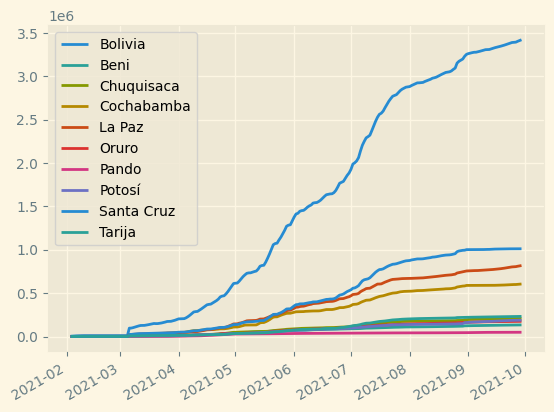

In [16]:
lista_dptm = list(MF2.groupby("departamento").count().index.array)

primera = pd.DataFrame()

for i in ["primera"]:
    for k in range(len(lista_dptm)):
        primerax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        primera = pd.concat([primera, primerax], axis=1)
        # display(primera)

primeras = primera.rename(columns={"Potosi": "Potosí"})
primeras.index = pd.to_datetime(primeras.index)

primeras.insert(0,"Bolivia",primeras.sum(axis=1))
primeras.plot()


primeras

Bolivia   Beni  Chuquisaca  Cochabamba  La Paz   Oruro  Pando  \
2021-02-22      210      0          10          24      12       0     85   
2021-02-23     1030      6         122         166      31      25    239   
2021-02-24     2634     42         276         588     264      99    349   
2021-02-25     6630     43         299        1320    1918     281    439   
2021-02-28     7702    237         524        1320    1918     487    515   
...             ...    ...         ...         ...     ...     ...    ...   
2021-09-24  2391586  86168      156797      464718  554396  130963  33298   
2021-09-25  2397494  86183      157918      466010  556207  131687  33298   
2021-09-26  2399229  86188      157950      466171  556815  131803  33324   
2021-09-27  2433274  87272      159646      470684  565709  134175  33457   
2021-09-29  2487482  89148      162071      477506  581773  137556  33779   

            Potosí  Santa Cruz  Tarija  
2021-02-22      54           0      25  
2021-02-23     123         244      74  
2021-02-24     173         619     224  
2021-02-25     265        1664     401  
2021-02-28     365        1664     672  
...            ...         ...     ...  
2021-09-24  131730      649332  184184  
2021-09-25  131970      649834  184387  
2021-09-26  131993      650593  184392  
2021-09-27  134317      661007  187007  
2021-09-29  137649      677856  190144  

[208 rows x 10 columns]

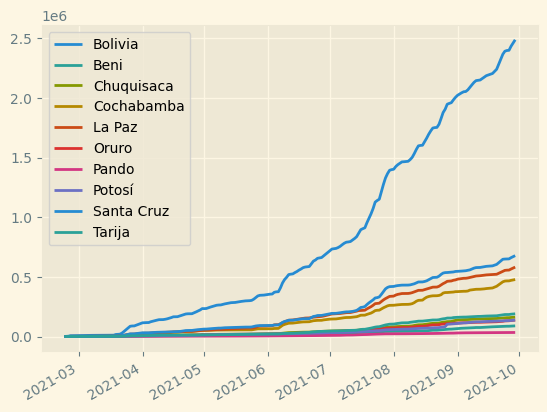

In [17]:
segunda = pd.DataFrame()

for i in ["segunda"]:
    for k in range(len(lista_dptm)):
        segundax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        segunda = pd.concat([segunda, segundax], axis=1)

segundas = segunda.rename(columns={"Potosi": "Potosí"})
segundas.index = pd.to_datetime(segundas.index)
segundas.insert(0,"Bolivia",segundas.sum(axis=1))
segundas.plot()

segundas

Bolivia    Beni  Chuquisaca  Cochabamba    La Paz    Oruro  \
2021-09-24  856092.0  6992.0     33098.0    153477.0  213737.0  31261.0   
2021-09-25  857671.0  7004.0     33116.0    153691.0  214525.0  31300.0   
2021-09-26  859159.0  7019.0     33121.0    154014.0  215324.0  31300.0   
2021-09-27  864103.0  7569.0     33447.0    154948.0  217760.0  31470.0   
2021-09-29  872267.0  8143.0     33890.0    156278.0  222827.0  31676.0   

            Pando   Potosí  Santa Cruz   Tarija  
2021-09-24    0.0  69835.0    315085.0  32607.0  
2021-09-25    0.0  70278.0    315088.0  32669.0  
2021-09-26    0.0  70617.0    315088.0  32676.0  
2021-09-27    0.0  70943.0    315092.0  32874.0  
2021-09-29    0.0  71231.0    315098.0  33124.0

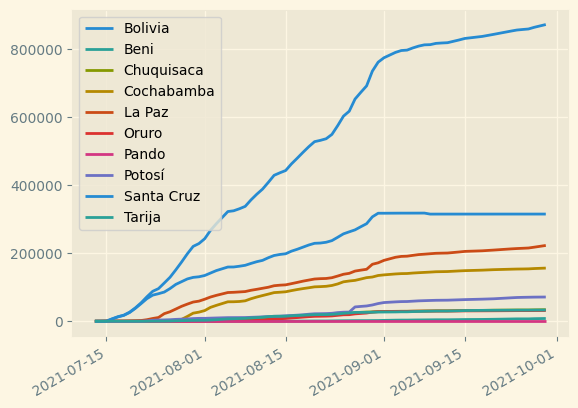

In [18]:
unica = pd.DataFrame()

for i in ["única"]:
    for k in range(len(lista_dptm)):
        unicax = MF2[(MF2.tipo==i) & (MF2.departamento==lista_dptm[k])].rename({"dosis":lista_dptm[k]},axis=1).iloc[:,-1]
        unica = pd.concat([unica, unicax], axis=1)

unicas = unica.rename(columns={"Potosi": "Potosí"})
unicas.index = pd.to_datetime(unicas.index)
unicas.insert(0,"Bolivia",unicas.sum(axis=1))
unicas.plot()

unicas = unicas.div(primeras/primeras).fillna(0)

unicas.tail()

## importar eduarrayas vaccinations.csv

In [19]:
df_vac_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/vaccinations.csv", 
    header=[0, 1], 
    index_col=[0])
display(df_vac_edu)

df_vac_edu.index = pd.to_datetime(df_vac_edu.index)

# vaccinations_df_columns = df_vac_edu.columns.map(lambda _: [__.lower() for __ in _])
# df_vac_edu.columns = pd.MultiIndex.from_tuples([*vaccinations_df_columns.values])


dptm_names = ['Beni', 'Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosi','Santa Cruz', 'Tarija']
dptm_names_fix = ['Beni', 'Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosí','Santa Cruz', 'Tarija']


dfx = pd.DataFrame()
for i in range(len(dptm_names)):
    df1 = df_vac_edu[dptm_names[i]].Primera
    df1.name = dptm_names_fix[i]
    dfx = pd.concat([dfx, df1], axis=1)
    # display(dfx)
primeras_edu = dfx
primeras_edu["Bolivia"] = primeras_edu.sum(axis=1)

dfx = pd.DataFrame()
for i in range(len(dptm_names)):
    df1 = df_vac_edu[dptm_names[i]].Segunda
    df1.name = dptm_names_fix[i]
    dfx = pd.concat([dfx, df1], axis=1)
segundas_edu = dfx
segundas_edu["Bolivia"] = segundas_edu.sum(axis=1)

dfx = pd.DataFrame()
for i in range(len(dptm_names)):
    df1 = df_vac_edu[dptm_names[i]].Unica
    df1.name = dptm_names_fix[i]
    dfx = pd.concat([dfx, df1], axis=1)
unicas_edu = dfx
unicas_edu["Bolivia"] = unicas_edu.sum(axis=1)

##new
dfx = pd.DataFrame()
for i in range(len(dptm_names)):
    df1 = df_vac_edu[dptm_names[i]].Tercera
    df1.name = dptm_names_fix[i]
    dfx = pd.concat([dfx, df1], axis=1)
terceras_edu = dfx
terceras_edu["Bolivia"] = terceras_edu.sum(axis=1)
##end new

primeras_edu.index = df_vac_edu.index
segundas_edu.index = df_vac_edu.index
unicas_edu.index = df_vac_edu.index
terceras_edu.index = df_vac_edu.index # new


primeras_edu = primeras_edu[ordenado]
segundas_edu = segundas_edu[ordenado]
unicas_edu = unicas_edu[ordenado]
terceras_edu = terceras_edu[ordenado]

# display(primeras_edu)
# display(segundas_edu)
# display(unicas_edu)
display(terceras_edu)

La Paz                              Cochabamba            \
             Primera   Segunda  Tercera     Unica    Primera   Segunda   
2021-02-02      12.0       0.0      0.0       0.0      278.0       0.0   
2021-02-03     361.0       0.0      0.0       0.0      687.0       0.0   
2021-02-04    1030.0       0.0      0.0       0.0     1044.0       0.0   
2021-02-05    1783.0       0.0      0.0       0.0     1369.0       0.0   
2021-02-06    1859.0       0.0      0.0       0.0     1369.0       0.0   
...              ...       ...      ...       ...        ...       ...   
2021-10-25  847482.0  676703.0  41283.0  246514.0   651609.0  543197.0   
2021-10-26  849291.0  679662.0  47097.0  247153.0   657176.0  546212.0   
2021-10-27  851867.0  683092.0  54491.0  248119.0   664105.0  549097.0   
2021-10-28  853805.0  684887.0  59864.0  248538.0   668309.0  551423.0   
2021-10-29  857111.0  688416.0  69261.0  250470.0   676467.0  555388.0   

                              Santa Cruz            ... Chuquisaca           \
            Tercera     Unica    Primera   Segunda  ...    Tercera    Unica   
2021-02-02      0.0       0.0      647.0       0.0  ...        0.0      0.0   
2021-02-03      0.0       0.0     1264.0       0.0  ...        0.0      0.0   
2021-02-04      0.0       0.0     1393.0       0.0  ...        0.0      0.0   
2021-02-05      0.0       0.0     1638.0       0.0  ...        0.0      0.0   
2021-02-06      0.0       0.0     1638.0       0.0  ...        0.0      0.0   
...             ...       ...        ...       ...  ...        ...      ...   
2021-10-25  50845.0  167887.0  1043540.0  814748.0  ...    14227.0  36269.0   
2021-10-26  55193.0  168185.0  1046243.0  821119.0  ...    16205.0  36344.0   
2021-10-27  60169.0  168468.0  1049217.0  827315.0  ...    18302.0  36465.0   
2021-10-28  63838.0  168530.0  1051370.0  831826.0  ...    19560.0  36489.0   
2021-10-29  70963.0  168783.0  1059918.0  837538.0  ...    22356.0  36557.0   

                Beni                               Pando                   \
             Primera   Segunda Tercera    Unica  Primera  Segunda Tercera   
2021-02-02       6.0       0.0     0.0      0.0    270.0      0.0     0.0   
2021-02-03      48.0       0.0     0.0      0.0    388.0      0.0     0.0   
2021-02-04      63.0       0.0     0.0      0.0    488.0      0.0     0.0   
2021-02-05     154.0       0.0     0.0      0.0    550.0      0.0     0.0   
2021-02-06     170.0       0.0     0.0      0.0    550.0      0.0     0.0   
...              ...       ...     ...      ...      ...      ...     ...   
2021-10-25  138847.0  103850.0  4451.0  12307.0  50788.0  36158.0  2747.0   
2021-10-26  139127.0  104417.0  5182.0  12373.0  50874.0  36298.0  3094.0   
2021-10-27  139523.0  105153.0  6304.0  12559.0  50981.0  36468.0  3545.0   
2021-10-28  139818.0  105528.0  7114.0  12664.0  51044.0  36545.0  3766.0   
2021-10-29  140615.0  106509.0  9192.0  13013.0  51285.0  36749.0  4739.0   

                  
           Unica  
2021-02-02   0.0  
2021-02-03   0.0  
2021-02-04   0.0  
2021-02-05   0.0  
2021-02-06   0.0  
...          ...  
2021-10-25   0.0  
2021-10-26   0.0  
2021-10-27   0.0  
2021-10-28   0.0  
2021-10-29   0.0  

[270 rows x 36 columns]

Bolivia   La Paz  Cochabamba  Santa Cruz    Oruro   Potosí  \
2021-02-02       0.0      0.0         0.0         0.0      0.0      0.0   
2021-02-03       0.0      0.0         0.0         0.0      0.0      0.0   
2021-02-04       0.0      0.0         0.0         0.0      0.0      0.0   
2021-02-05       0.0      0.0         0.0         0.0      0.0      0.0   
2021-02-06       0.0      0.0         0.0         0.0      0.0      0.0   
...              ...      ...         ...         ...      ...      ...   
2021-10-25  189461.0  41283.0     50845.0     49243.0  10177.0   6758.0   
2021-10-26  212228.0  47097.0     55193.0     55442.0  11138.0   7650.0   
2021-10-27  240875.0  54491.0     60169.0     63466.0  12386.0   9091.0   
2021-10-28  262528.0  59864.0     63838.0     70508.0  13459.0   9946.0   
2021-10-29  305066.0  69261.0     70963.0     82352.0  16238.0  12355.0   

            Chuquisaca   Tarija    Beni   Pando  
2021-02-02         0.0      0.0     0.0     0.0  
2021-02-03         0.0      0.0     0.0     0.0  
2021-02-04         0.0      0.0     0.0     0.0  
2021-02-05         0.0      0.0     0.0     0.0  
2021-02-06         0.0      0.0     0.0     0.0  
...                ...      ...     ...     ...  
2021-10-25     14227.0   9730.0  4451.0  2747.0  
2021-10-26     16205.0  11227.0  5182.0  3094.0  
2021-10-27     18302.0  13121.0  6304.0  3545.0  
2021-10-28     19560.0  14473.0  7114.0  3766.0  
2021-10-29     22356.0  17610.0  9192.0  4739.0  

[270 rows x 10 columns]

In [20]:
# fig, axs = plt.subplots(4,3,figsize=(20,15))
# axs = axs.flatten()

# fig.suptitle("Vacunación contra el COVID-19 en Bolivia", fontsize =24, y=1.03)

# #fig.set_facecolor("grey")
# gs = fig.add_gridspec(nrows=4, ncols=3)
# axs1 = fig.add_subplot(gs[0,0:3])

# list1 = ["la paz", "cochabamba","santa cruz", "oruro", "potosi","tarija","chuquisaca","beni","pando"]

# axs1.plot(df_vac_edu_bolivia.index, df_vac_edu_bolivia.diff().rolling(7).mean(), label= df_vac_edu_bolivia.columns)
# axs1.legend()
# axs1.set_title("Bolivia")
# axs[0].axis('off')
# axs[1].axis('off')
# axs[2].axis('off')

# for i in range(9):
#     axs[i+3].plot(df_vac_edu.index, df_vac_edu[list1[i]].diff().rolling(7).mean(), label = df_vac_edu[list1[i]].columns)
#     axs[i+3].set_title(list1[i])
#     axs[i+3].legend()
    


# fig.tight_layout()


# Consolidar (segundas_alt = TRUE!)

In [21]:
print("bolcuantas dias = " + "{}".format(len(primeras_BC)))
print("maufronda dias= " + "{}".format(len(primeras_MF)))
primeras_MF2 = primeras
print("maufronda 2 dias= " + "{}".format(len(primeras_MF2)))
print("edu dias= " + "{}".format(len(primeras_edu)))

# if len(primeras_BC) > len(primeras_MF):
#   primeras = primeras_BC
#   segundas = segundas_BC
#   print("BolCuantas más actualizada, activada ñie")
# elif len(primeras_BC) < len(primeras_MF):
#   primeras = primeras_MF
#   segundas = segundas_MF
#   print("mauforonda más actualizada, activada ñie")

# elif len(primeras_BC) == len(primeras_MF):
#   primeras = primeras_MF
#   segundas = segundas_MF
#   print("ambas igual de actualizadas, mauforonda activada ñie")

bolcuantas dias = 206
maufronda dias= 167
maufronda 2 dias= 216
edu dias= 270


In [22]:
#final define
primeras = primeras_edu#.dropna()
segundas = segundas_edu#.dropna()
unicas = unicas_edu#.dropna()
terceras = terceras_edu

terceras

Bolivia   La Paz  Cochabamba  Santa Cruz    Oruro   Potosí  \
2021-02-02       0.0      0.0         0.0         0.0      0.0      0.0   
2021-02-03       0.0      0.0         0.0         0.0      0.0      0.0   
2021-02-04       0.0      0.0         0.0         0.0      0.0      0.0   
2021-02-05       0.0      0.0         0.0         0.0      0.0      0.0   
2021-02-06       0.0      0.0         0.0         0.0      0.0      0.0   
...              ...      ...         ...         ...      ...      ...   
2021-10-25  189461.0  41283.0     50845.0     49243.0  10177.0   6758.0   
2021-10-26  212228.0  47097.0     55193.0     55442.0  11138.0   7650.0   
2021-10-27  240875.0  54491.0     60169.0     63466.0  12386.0   9091.0   
2021-10-28  262528.0  59864.0     63838.0     70508.0  13459.0   9946.0   
2021-10-29  305066.0  69261.0     70963.0     82352.0  16238.0  12355.0   

            Chuquisaca   Tarija    Beni   Pando  
2021-02-02         0.0      0.0     0.0     0.0  
2021-02-03         0.0      0.0     0.0     0.0  
2021-02-04         0.0      0.0     0.0     0.0  
2021-02-05         0.0      0.0     0.0     0.0  
2021-02-06         0.0      0.0     0.0     0.0  
...                ...      ...     ...     ...  
2021-10-25     14227.0   9730.0  4451.0  2747.0  
2021-10-26     16205.0  11227.0  5182.0  3094.0  
2021-10-27     18302.0  13121.0  6304.0  3545.0  
2021-10-28     19560.0  14473.0  7114.0  3766.0  
2021-10-29     22356.0  17610.0  9192.0  4739.0  

[270 rows x 10 columns]

## Consolidar

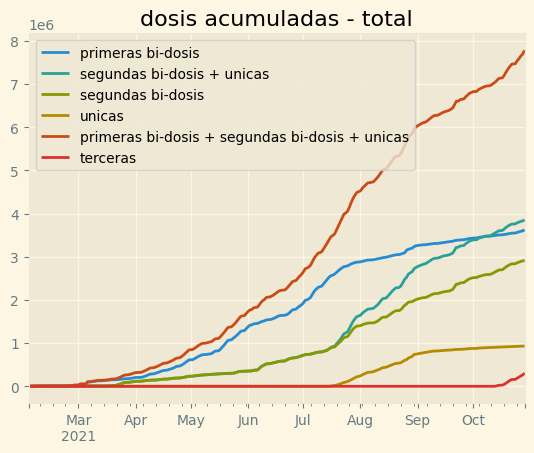

In [23]:
#DOSIS ACUMULADAS TOTAL
primeras_acum = primeras.dropna().resample("D").mean().interpolate("linear")
segundas_acum = segundas.dropna().resample("D").mean().interpolate("linear") + unicas.dropna().resample("D").mean().interpolate("linear")
unicas_acum = unicas.dropna().resample("D").mean().interpolate("linear")
segundas_acum_alt = segundas.dropna().resample("D").mean().interpolate("linear")
ambas_acum = primeras.dropna().resample("D").mean().interpolate("linear") + segundas.dropna().resample("D").mean().interpolate("linear") + unicas.dropna().resample("D").mean().interpolate() + terceras.dropna().resample("D").mean().interpolate()

primeras_acum.index = pd.to_datetime(primeras_acum.index) 
segundas_acum.index = pd.to_datetime(segundas_acum.index)
segundas_acum_alt.index = pd.to_datetime(segundas_acum_alt.index)

ambas_acum.index = pd.to_datetime(ambas_acum.index)

#new
terceras_acum = terceras_edu.dropna().resample("D").mean().interpolate("linear")
terceras_acum.index = pd.to_datetime(terceras_acum.index)
#end new


plt.title("dosis acumuladas - total")
primeras_acum.Bolivia.plot(label="primeras bi-dosis")
segundas_acum.Bolivia.plot(label="segundas bi-dosis + unicas")
segundas_acum_alt.Bolivia.plot(label="segundas bi-dosis")
unicas_acum.Bolivia.plot(label="unicas")
ambas_acum.Bolivia.plot(label="primeras bi-dosis + segundas bi-dosis + unicas")
terceras_acum.Bolivia.plot(label="terceras")
plt.legend()

# ambas_acum

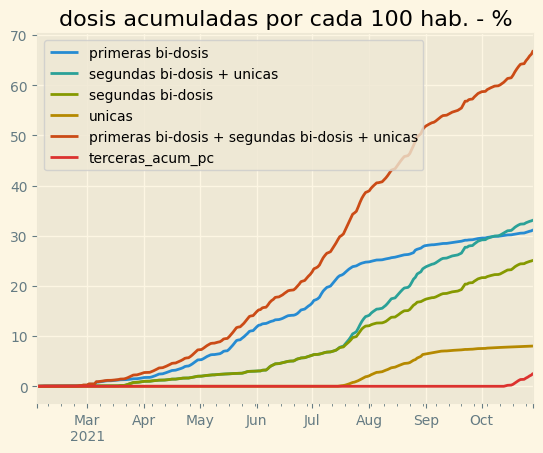

In [24]:
#DOSIS ACUMULADAS POR CADA 100 habitantes
primeras_acum_pc = primeras_acum.div(habitantes.iloc[0])*100
segundas_acum_pc = segundas_acum.div(habitantes.iloc[0])*100
segundas_acum_pc_alt = segundas_acum_alt.div(habitantes.iloc[0])*100
unicas_acum_pc = unicas_acum.div(habitantes.iloc[0])*100
ambas_acum_pc = ambas_acum.div(habitantes.iloc[0]) * 100

terceras_acum_pc = terceras_acum.div(habitantes.iloc[0]) * 100 # new


plt.title("dosis acumuladas por cada 100 hab. - %")
primeras_acum_pc.Bolivia.plot(label="primeras bi-dosis")
segundas_acum_pc.Bolivia.plot(label="segundas bi-dosis + unicas")
segundas_acum_pc_alt.Bolivia.plot(label="segundas bi-dosis")
unicas_acum_pc.Bolivia.plot(label="unicas")
ambas_acum_pc.Bolivia.plot(label="primeras bi-dosis + segundas bi-dosis + unicas")
terceras_acum_pc.Bolivia.plot(label="terceras_acum_pc") #new

plt.legend()
# ambas_acum_pc

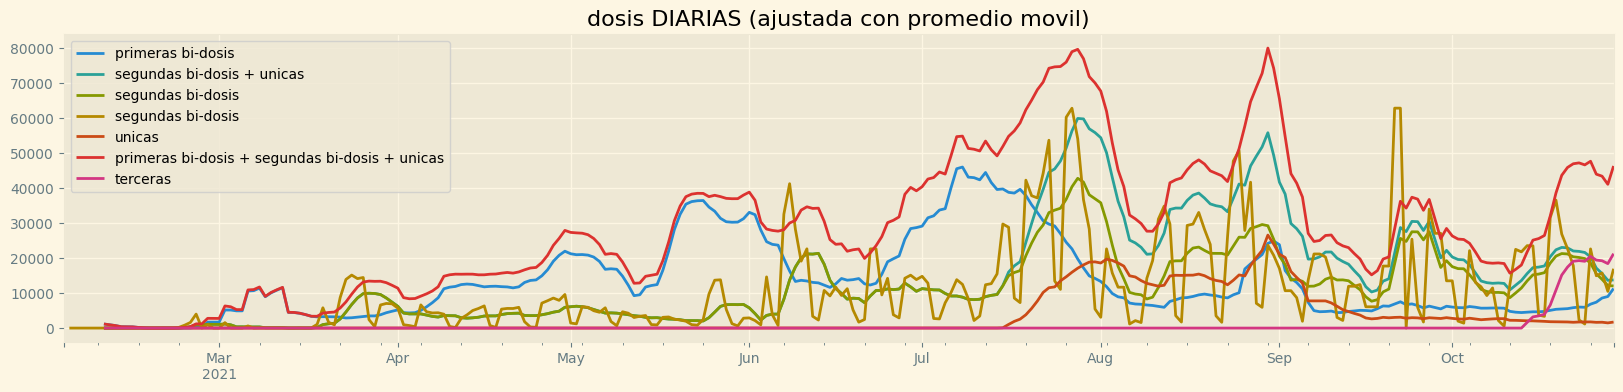

In [25]:
#DOSIS DIARIAS TOTAL
primeras_dia = primeras_acum.diff()
segundas_dia =  segundas_acum.diff()
segundas_dia_alt = segundas_acum_alt.diff()
unicas_dia = unicas_acum.diff()
ambas_dia = ambas_acum.diff()

terceras_dia = terceras_acum.diff() #diff

plt.rcParams['figure.figsize'] = (20,4)
plt.title("dosis DIARIAS (ajustada con promedio movil)")
primeras_dia.Bolivia.rolling(7).mean().plot(label="primeras bi-dosis")
segundas_dia.Bolivia.rolling(7).mean().plot(label="segundas bi-dosis + unicas")
segundas_dia_alt.Bolivia.rolling(7).mean().plot(label="segundas bi-dosis")
segundas_dia_alt.Bolivia.plot(label="segundas bi-dosis")

unicas_dia.Bolivia.rolling(7).mean().plot(label="unicas")
ambas_dia.Bolivia.rolling(7).mean().plot(label="primeras bi-dosis + segundas bi-dosis + unicas")

terceras_dia.Bolivia.rolling(7).mean().plot(label="terceras")

plt.legend()

# ambas_dia

(18910.0, 18929.0)

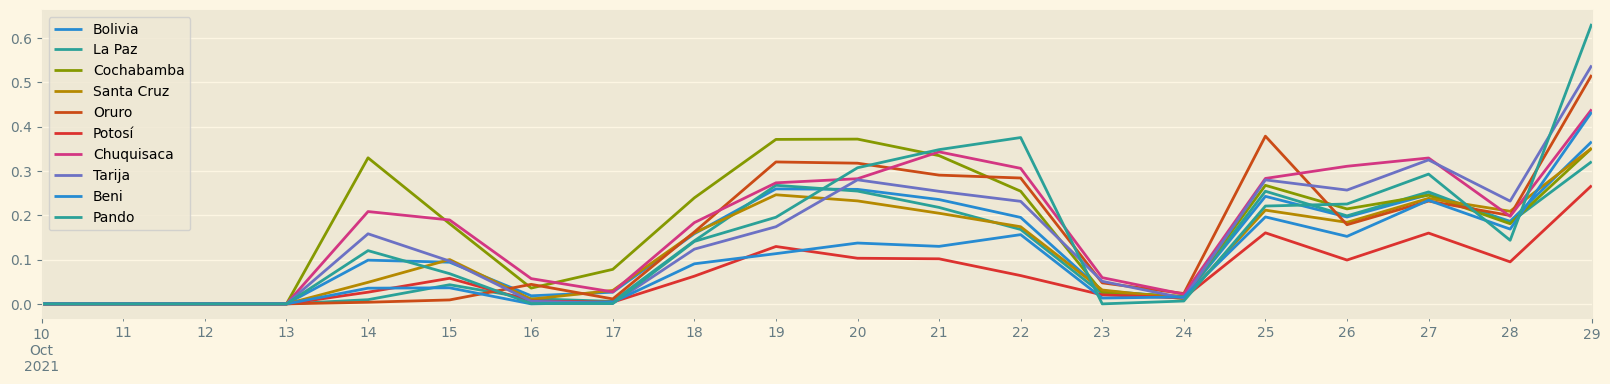

In [26]:
# DIARIAS POR CADA 100 HABITANTES - no graph here
primeras_dia_pc = primeras_dia.div(habitantes.iloc[0])*100
segundas_dia_pc = segundas_dia.div(habitantes.iloc[0])*100
segundas_dia_pc_alt = segundas_dia_alt.div(habitantes.iloc[0])*100
unicas_dia_pc = unicas_dia.div(habitantes.iloc[0])*100
ambas_dia_pc = ambas_dia.div(habitantes.iloc[0])*100

terceras_dia_pc = terceras_dia.div(habitantes.iloc[0])*100 #new

terceras_dia_pc.plot()
plt.xlim(xmin = terceras_dia_pc.index[250])
# ambas_dia_pc.Bolivia.plot()
# ambas_dia_pc

## almenos una dosis y COMPLETA- NUEVO!

Bolivia     La Paz  Cochabamba  Santa Cruz     Oruro    Potosí  \
2021-02-02     1589.0       12.0       278.0       647.0      26.0     138.0   
2021-02-03     3560.0      361.0       687.0      1264.0     106.0     203.0   
2021-02-04     5172.0     1030.0      1044.0      1393.0     195.0     293.0   
2021-02-05     7430.0     1783.0      1369.0      1638.0     300.0     396.0   
2021-02-06     7636.0     1859.0      1369.0      1638.0     412.0     396.0   
...               ...        ...         ...         ...       ...       ...   
2021-10-25  4487799.0  1093996.0    819496.0   1364802.0  215106.0  267685.0   
2021-10-26  4500928.0  1096444.0    825361.0   1367671.0  215442.0  267807.0   
2021-10-27  4517852.0  1099986.0    832573.0   1370887.0  216035.0  268196.0   
2021-10-28  4528664.0  1102343.0    836839.0   1373172.0  216502.0  268379.0   
2021-10-29  4556183.0  1107581.0    845250.0   1382089.0  217558.0  269367.0   

            Chuquisaca    Tarija      Beni    Pando  
2021-02-02       122.0      90.0       6.0    270.0  
2021-02-03       303.0     200.0      48.0    388.0  
2021-02-04       304.0     362.0      63.0    488.0  
2021-02-05       529.0     711.0     154.0    550.0  
2021-02-06       530.0     712.0     170.0    550.0  
...                ...       ...       ...      ...  
2021-10-25    252906.0  271866.0  151154.0  50788.0  
2021-10-26    253569.0  272260.0  151500.0  50874.0  
2021-10-27    254309.0  272803.0  152082.0  50981.0  
2021-10-28    254674.0  273229.0  152482.0  51044.0  
2021-10-29    255433.0  273992.0  153628.0  51285.0  

[270 rows x 10 columns]

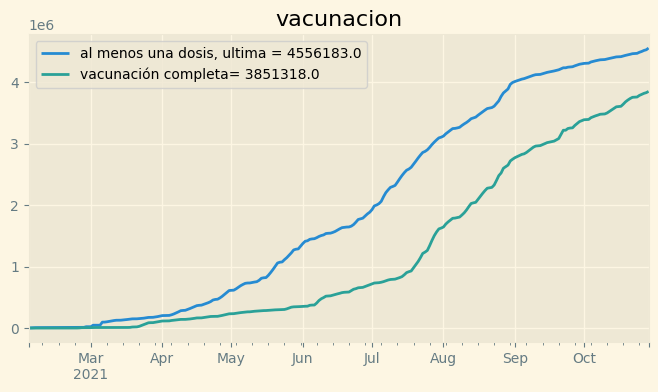

In [27]:
almenos_una = primeras.dropna().resample("D").mean().interpolate() + unicas.dropna().resample("D").mean().interpolate()
almenos_una_acum = almenos_una.dropna().resample("D").mean().interpolate()

completa = segundas.dropna().resample("D").mean().interpolate() + unicas.dropna().resample("D").mean().interpolate()
completa_acum = completa.dropna().resample("D").mean().interpolate()

plt.rcParams['figure.figsize'] = (8,4)
plt.title("vacunacion")
almenos_una_acum.Bolivia.plot(label="al menos una dosis, ultima = {}".format(almenos_una_acum.Bolivia[-1]))
completa_acum.Bolivia.plot(label="vacunación completa= {}".format(completa_acum.Bolivia[-1]))
plt.legend()

almenos_una_acum

Bolivia  La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  \
2021-02-02      NaN     NaN         NaN         NaN     NaN     NaN   
2021-02-03   1971.0   349.0       409.0       617.0    80.0    65.0   
2021-02-04   1612.0   669.0       357.0       129.0    89.0    90.0   
2021-02-05   2258.0   753.0       325.0       245.0   105.0   103.0   
2021-02-06    206.0    76.0         0.0         0.0   112.0     0.0   
...             ...     ...         ...         ...     ...     ...   
2021-10-25  17441.0  4036.0      6244.0      3857.0   791.0   292.0   
2021-10-26  13129.0  2448.0      5865.0      2869.0   336.0   122.0   
2021-10-27  16924.0  3542.0      7212.0      3216.0   593.0   389.0   
2021-10-28  10812.0  2357.0      4266.0      2285.0   467.0   183.0   
2021-10-29  27519.0  5238.0      8411.0      8917.0  1056.0   988.0   

            Chuquisaca  Tarija    Beni  Pando  
2021-02-02         NaN     NaN     NaN    NaN  
2021-02-03       181.0   110.0    42.0  118.0  
2021-02-04         1.0   162.0    15.0  100.0  
2021-02-05       225.0   349.0    91.0   62.0  
2021-02-06         1.0     1.0    16.0    0.0  
...                ...     ...     ...    ...  
2021-10-25       972.0   509.0   652.0   88.0  
2021-10-26       663.0   394.0   346.0   86.0  
2021-10-27       740.0   543.0   582.0  107.0  
2021-10-28       365.0   426.0   400.0   63.0  
2021-10-29       759.0   763.0  1146.0  241.0  

[270 rows x 10 columns]

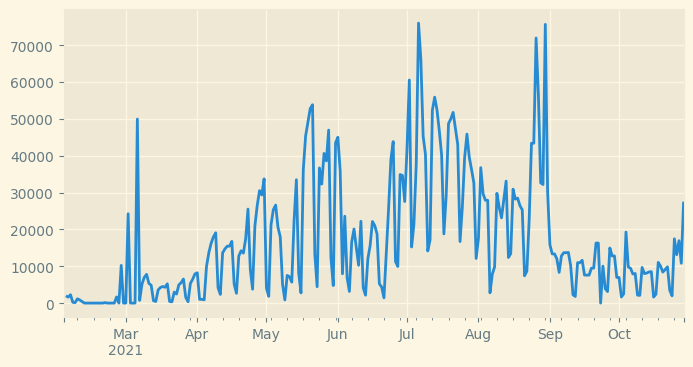

In [28]:
almenos_una_dia = almenos_una_acum.diff()
# completa_dia = completa_acum.diff()
almenos_una_dia.Bolivia.plot()
# completa_dia.Bolivia.plot()
almenos_una_dia

In [29]:
# almenos_una_pc_dia = almenos_una_dia.div(habitantes.iloc[0])*100
# almenos_una_pc_dia.plot()
# almenos_una_pc_dia


<AxesSubplot:>

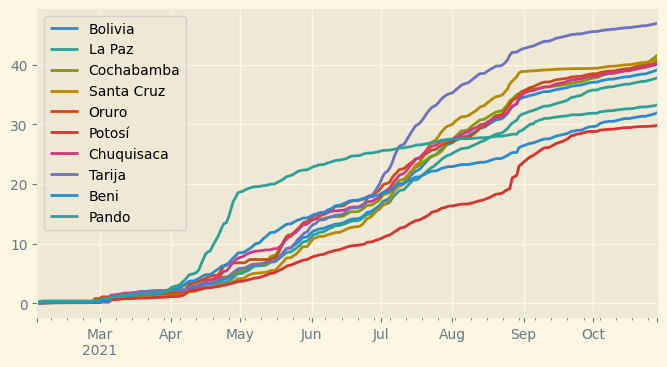

In [30]:
almenos_una_pc_acum = almenos_una_acum.div(habitantes.iloc[0])*100
completa_pc_acum = completa_acum.div(habitantes.iloc[0])*100

almenos_una_vacunable_acum = almenos_una_acum.div(pob_vac.iloc[0])*100
completa_vacunable_acum = completa_acum.div(pob_vac.iloc[0])*100


almenos_una_pc_acum.plot()

## RESUMEN NACIONAL

Primeras Dosis Diarias  Primeras Dosis Acumulado  \
2021-02-02                     NaN                    1589.0   
2021-02-03                  1971.0                    3560.0   
2021-02-04                  1612.0                    5172.0   
2021-02-05                  2258.0                    7430.0   
2021-02-06                   206.0                    7636.0   
...                            ...                       ...   
2021-10-25                 14412.0                 3563223.0   
2021-10-26                 11827.0                 3575050.0   
2021-10-27                 14926.0                 3589976.0   
2021-10-28                  9969.0                 3599945.0   
2021-10-29                 24254.0                 3624199.0   

            Primeras Dosis Acumulado, % poblacion  Segundas y Janssen Diarias  \
2021-02-02                               0.013675                         NaN   
2021-02-03                               0.030637                         0.0   
2021-02-04                               0.044509                         0.0   
2021-02-05                               0.063941                         0.0   
2021-02-06                               0.065714                         0.0   
...                                           ...                         ...   
2021-10-25                              30.664570                     25667.0   
2021-10-26                              30.766351                     16268.0   
2021-10-27                              30.894802                     17733.0   
2021-10-28                              30.980594                     11344.0   
2021-10-29                              31.189320                     20231.0   

            Segundas y Janssen Acumulada  \
2021-02-02                           0.0   
2021-02-03                           0.0   
2021-02-04                           0.0   
2021-02-05                           0.0   
2021-02-06                           0.0   
...                                  ...   
2021-10-25                     3785742.0   
2021-10-26                     3802010.0   
2021-10-27                     3819743.0   
2021-10-28                     3831087.0   
2021-10-29                     3851318.0   

            Segundas y Janssen Acumulado, % Poblacion  Dosis Todas Diarias  \
2021-02-02                                   0.000000                  NaN   
2021-02-03                                   0.000000               1971.0   
2021-02-04                                   0.000000               1612.0   
2021-02-05                                   0.000000               2258.0   
2021-02-06                                   0.000000                206.0   
...                                               ...                  ...   
2021-10-25                                  32.579535              68271.0   
2021-10-26                                  32.719535              50862.0   
2021-10-27                                  32.872143              61306.0   
2021-10-28                                  32.969768              42966.0   
2021-10-29                                  33.143873              87023.0   

            Dosis Todas Acumuladas  Terceras acumuladas  Terceras diarias  
2021-02-02                  1589.0             0.013675               0.0  
2021-02-03                  3560.0             0.030637               0.0  
2021-02-04                  5172.0             0.044509               0.0  
2021-02-05                  7430.0             0.063941               0.0  
2021-02-06                  7636.0             0.065714               0.0  
...                            ...                  ...               ...  
2021-10-25               7538426.0            64.874578          189461.0  
2021-10-26               7589288.0            65.312289          212228.0  
2021-10-27               7650594.0            65.839880          240875.0  
2021-10-28               7693560.0          

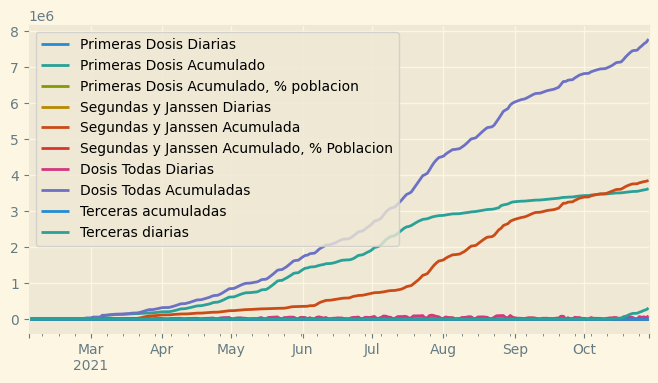

In [31]:
#RESUMEN NACIONAL
vacunacion_BO_df = pd.concat([primeras_dia.Bolivia,
                              primeras_acum.Bolivia,
                              primeras_acum_pc.Bolivia,
                              segundas_dia.Bolivia,
                              segundas_acum.Bolivia,
                              segundas_acum_pc.Bolivia,
                              ambas_dia.Bolivia,
                              ambas_acum.Bolivia,
                              ambas_acum_pc.Bolivia,
                              terceras_acum.Bolivia,
                              terceras_dia.Bolivia
                              ], 
                             axis=1, 
                             keys = ["Primeras Dosis Diarias", 
                                     "Primeras Dosis Acumulado", 
                                     "Primeras Dosis Acumulado, % poblacion",
                                     "Segundas y Janssen Diarias",
                                     "Segundas y Janssen Acumulada", 
                                     "Segundas y Janssen Acumulado, % Poblacion",
                                     "Dosis Todas Diarias",
                                     "Dosis Todas Acumuladas",
                                     "Terceras acumuladas",
                                     "Terceras diarias"])

vacunacion_BO_df.plot()
vacunacion_BO_df

# Comparación

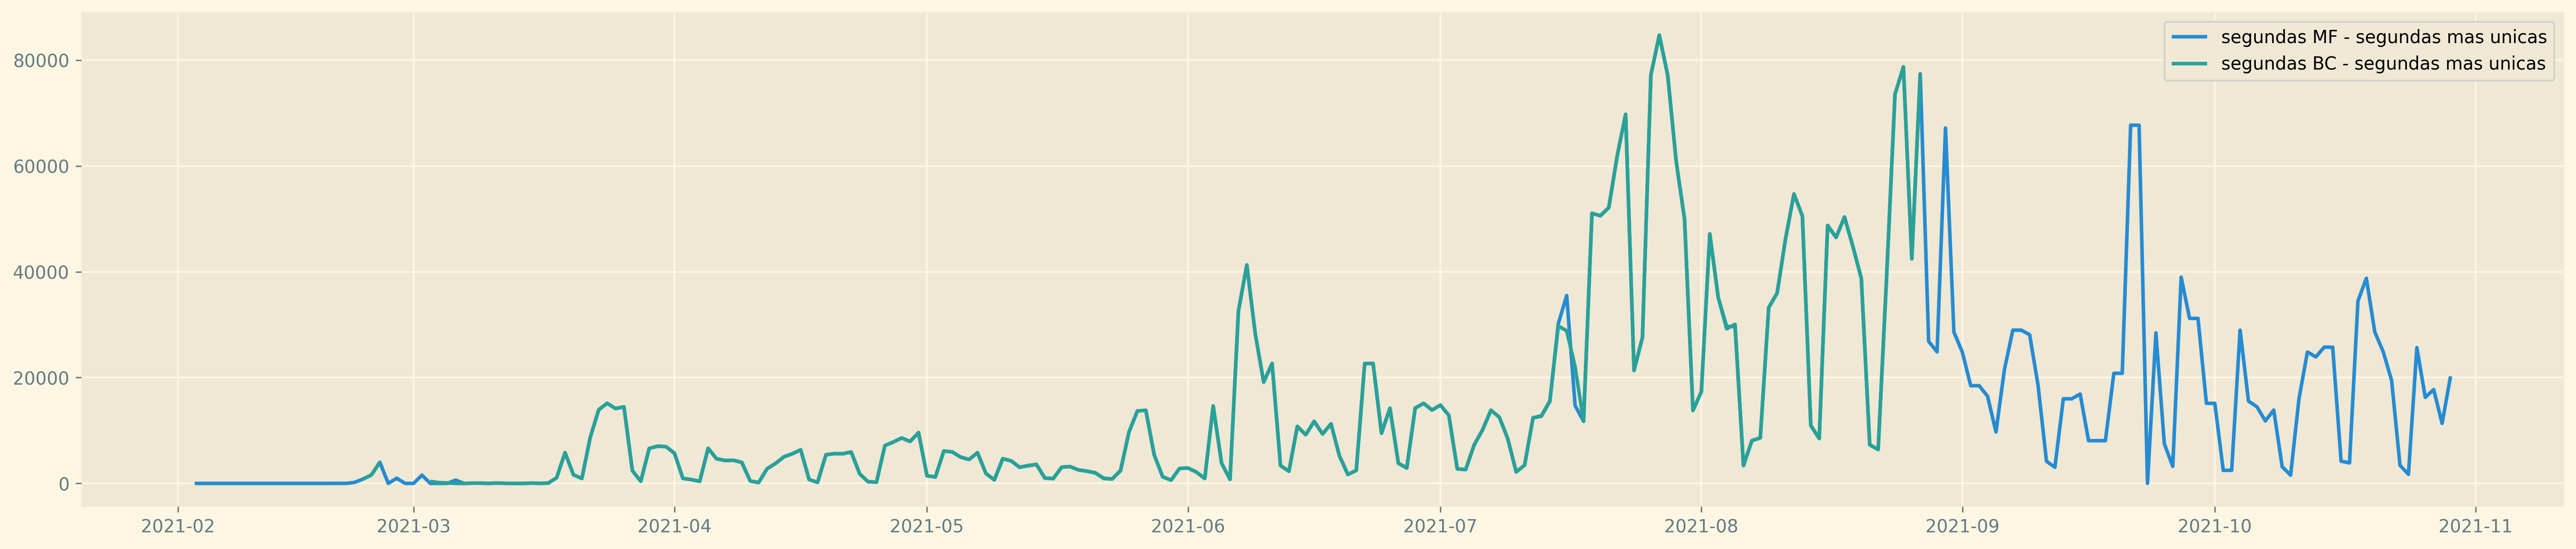

In [32]:
primeras_BC
segundas_BC

fig, axs = plt.subplots(1,1, figsize=(25,5), dpi=300)

#plt.rcParams['lines.linestyle'] = '--'
axs.plot(segundas_acum.diff().Bolivia, label="segundas MF - segundas mas unicas")
axs.plot(segundas_BC.diff().Bolivia, label="segundas BC - segundas mas unicas")
# axs.plot(primeras_acum.diff().Bolivia, label="primeras MF")
# axs.plot(primeras_BC.diff().Bolivia, label="primeras BC")

axs.legend()

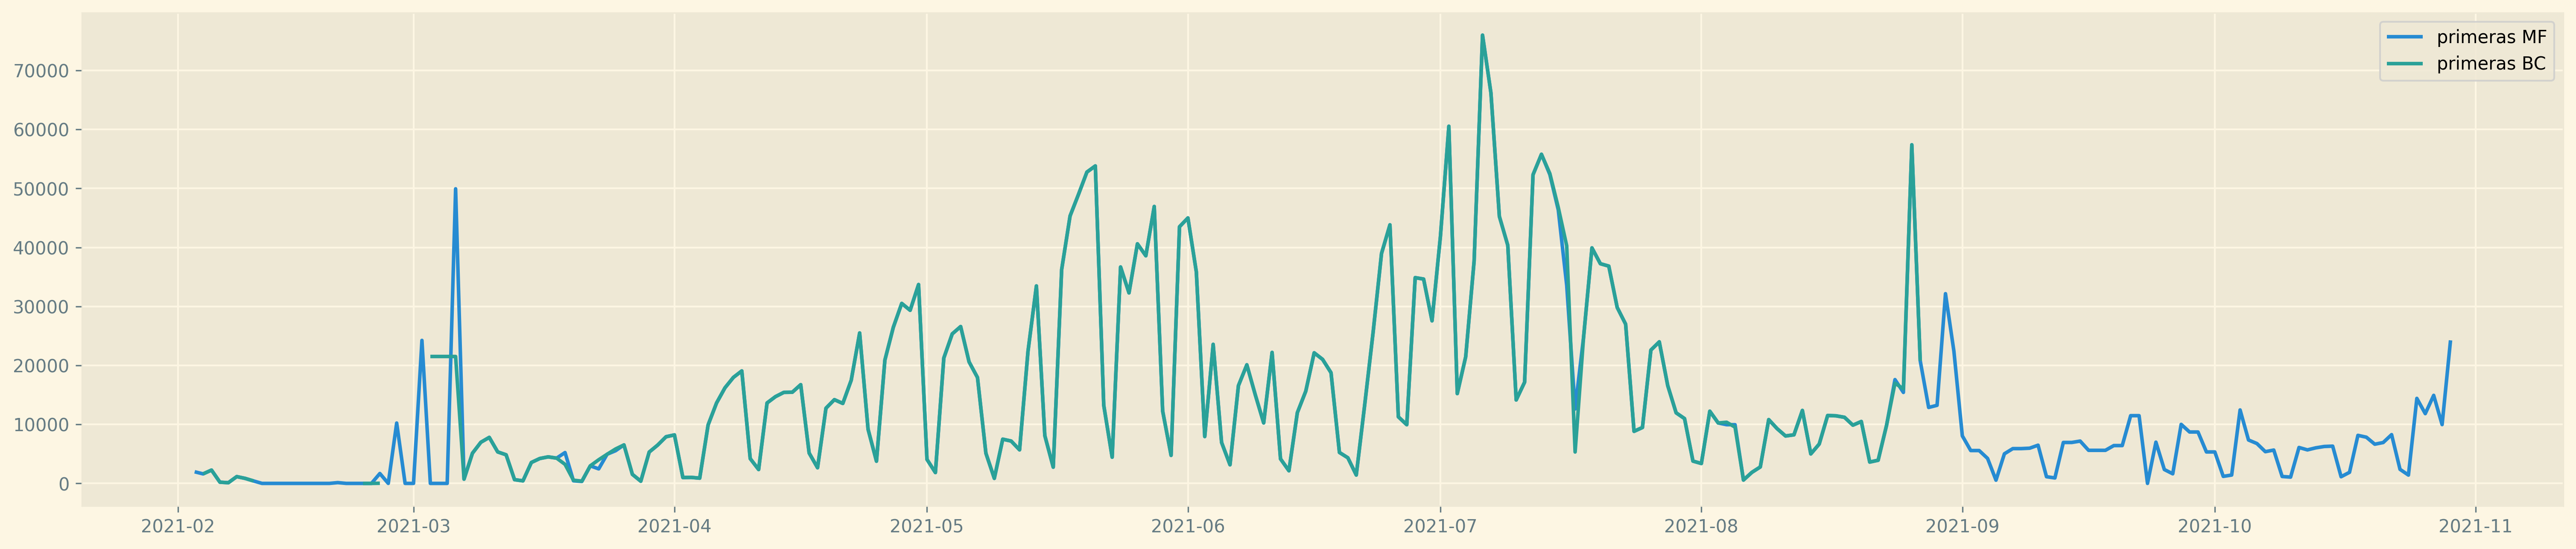

In [33]:
fig, axs = plt.subplots(1,1, figsize=(25,5), dpi=300)

# axs.plot(primeras.Bolivia, label="primeras MF")
# axs.plot(primeras_BC.Bolivia, label="primeras BC")
axs.plot(primeras_acum.diff().Bolivia, label="primeras MF")
axs.plot(primeras_BC.diff().Bolivia, label="primeras BC")
axs.legend()

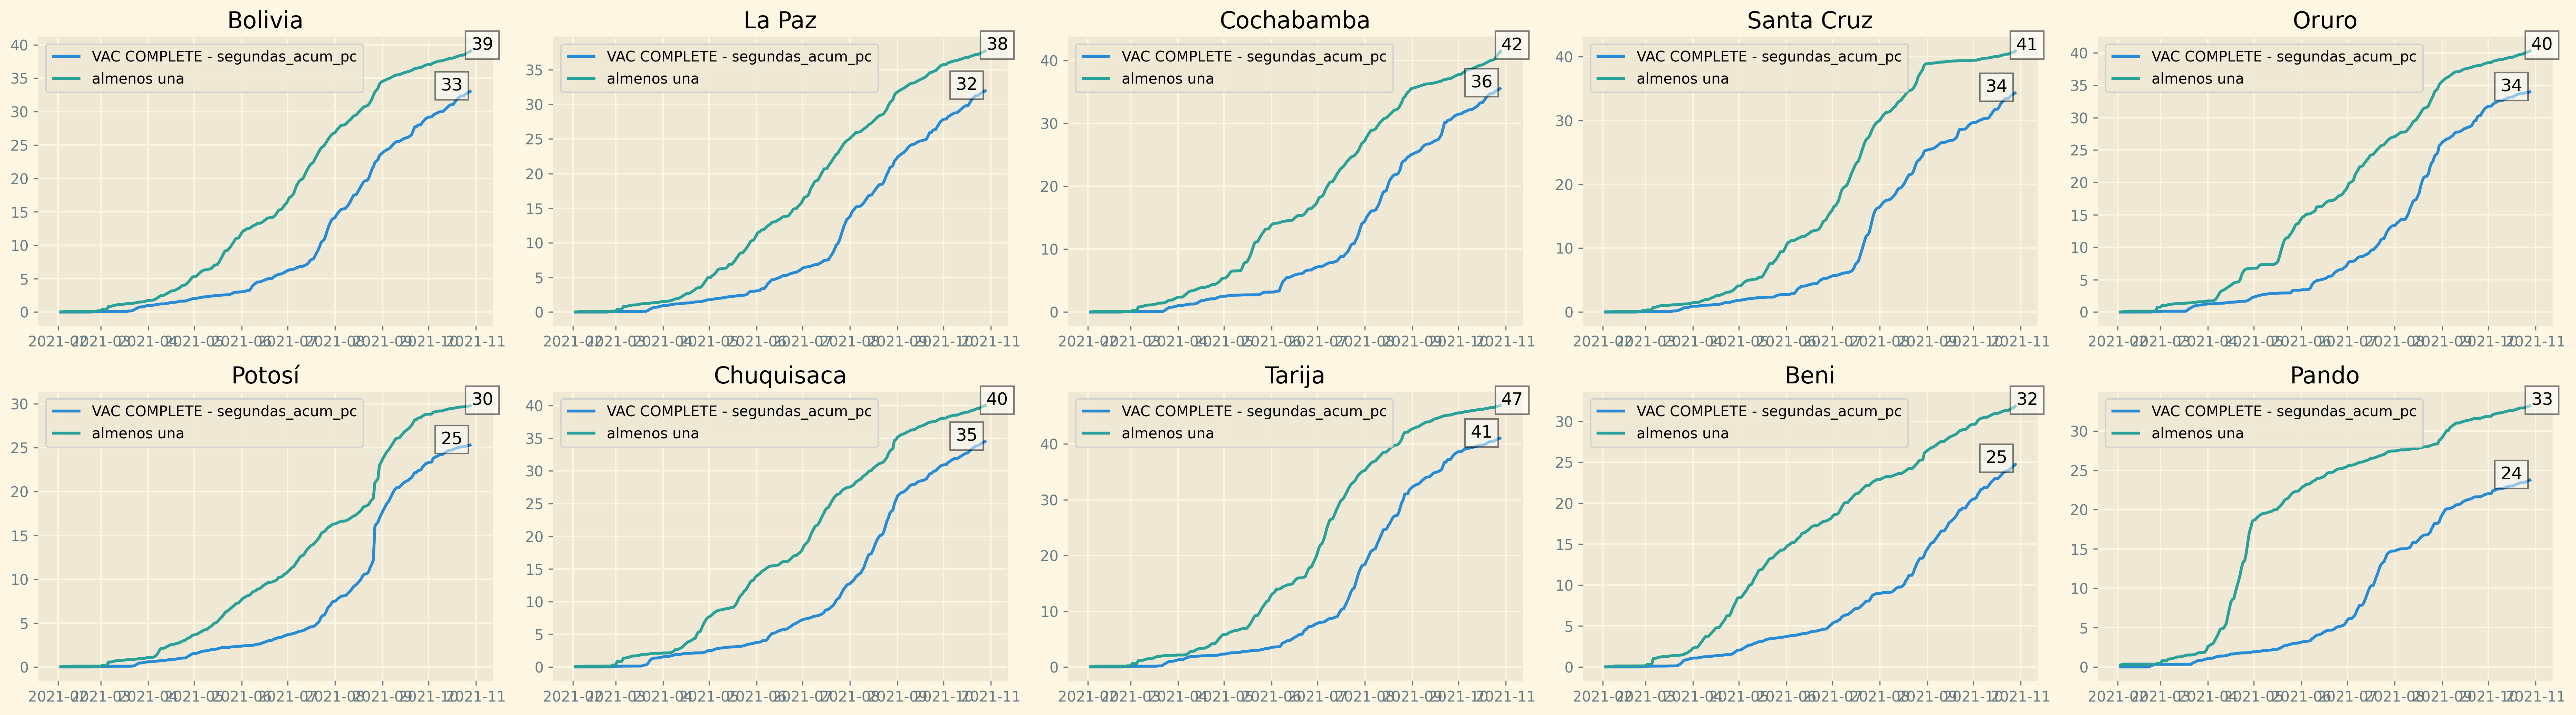

In [34]:
fig, axs = plt.subplots(2,5, figsize=(25,7), dpi=300)
axs = axs.flatten()

for i in range(10):
    axs[i].set_title(segundas_acum_pc.columns[i])
    axs[i].plot(segundas_acum_pc.iloc[:,i], label="VAC COMPLETE - segundas_acum_pc")
    axs[i].plot(almenos_una_pc_acum.iloc[:,i], label="almenos una")
    axs[i].legend()
    annotate_last_flat(almenos_una_pc_acum,i, axis=i,offset_days=0)
    annotate_last_flat(segundas_acum_pc,i, axis=i,offset_days=-20)
    
fig.tight_layout()

# Guardar Datos en .CSV

In [35]:
folder=""

primeras_acum.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Acumuladas.csv")
primeras_acum_pc.round(2).to_csv(directory + folder + "Primeras_Acumuladas_PorCada100Hab.csv")
primeras_dia.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Diario.csv")
primeras_dia_pc.round(2).to_csv(directory + folder + "Primeras_Diario_PorCada100Hab.csv")

segundas_acum.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Acumuladas.csv")
segundas_acum_pc.round(2).to_csv(directory + folder + "Segundas_Acumuladas_PorCada100Hab.csv")
segundas_dia.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Diario.csv")
segundas_dia_pc.round(2).to_csv(directory + folder + "Segundas_Diario_PorCada100Hab.csv")

ambas_acum.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Acumuladas.csv")
ambas_acum_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Acumuladas_PorCada100Hab.csv")
ambas_dia.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Diarias.csv")
ambas_dia_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Diarias_PorCada100Hab.csv")

vacunacion_BO_df.round(1).to_csv(directory + folder + "Resumen_Nacional_Bolivia_Vacuna.csv")

## Ultima Actualización

In [36]:
ultima_actualizacion = "última actualización: {}".format(primeras_acum.index[-1].date())
ultima_actualizacion

'última actualización: 2021-10-29'

# Gráficas


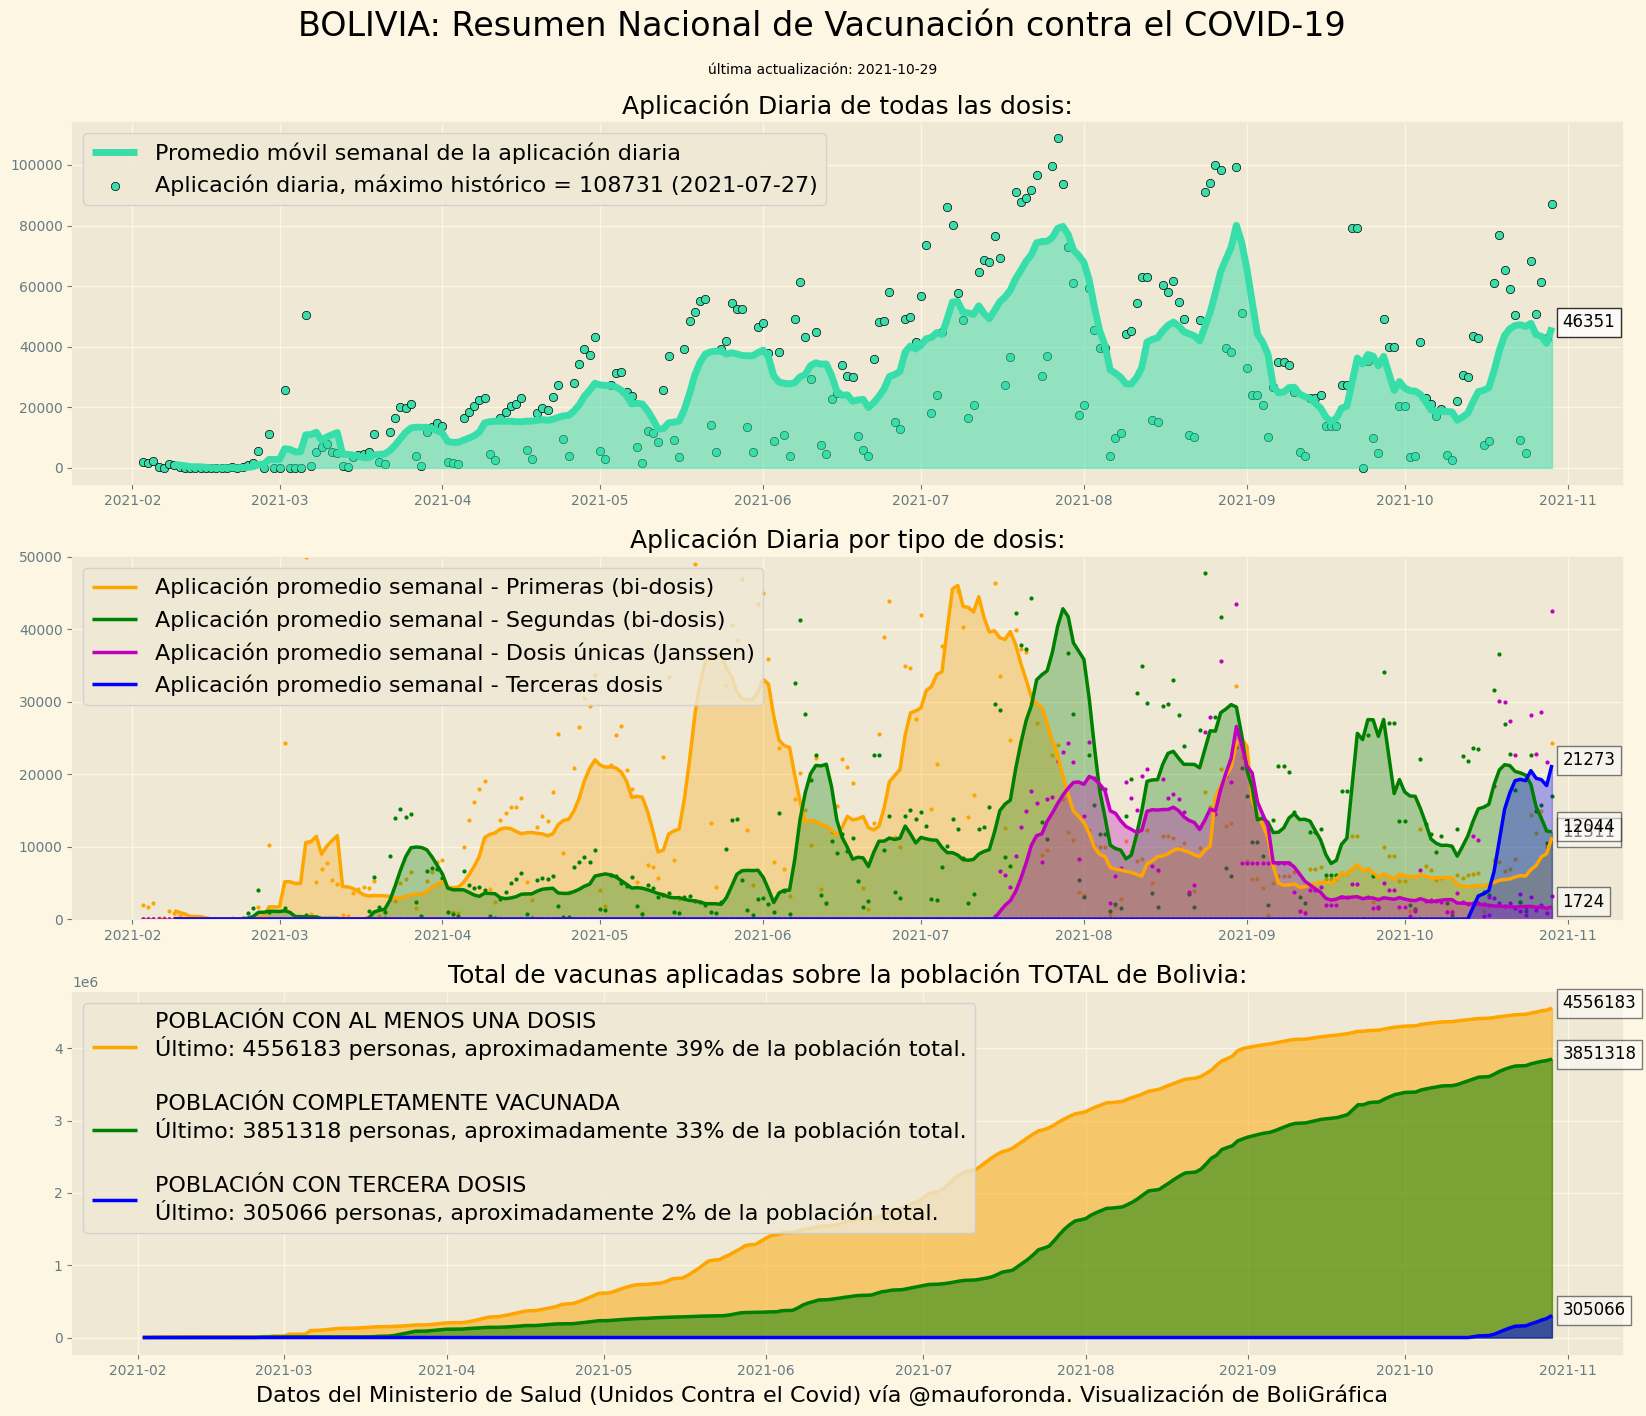

In [37]:
fig, axs = plt.subplots(3,1, sharex=False,
                        figsize=(20,16),
                        dpi=100
                        )

axs = axs.flatten()

fig.suptitle("BOLIVIA: Resumen Nacional de Vacunación contra el COVID-19", fontsize = 24, y=.95)
fig.text(0.5,.91,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,0.08,horizontalalignment='center',s=atribucion, fontsize=16)
# fig.set_facecolor(background_color1)


#axs[0].grid(zorder=0)
axs[0].set_title("Aplicación Diaria de todas las dosis:", fontsize=18)
axs[0].scatter(ambas_dia.index, ambas_dia.Bolivia, color=color_total_dosis1, label="Aplicación diaria, máximo histórico = {} ({})".format(ambas_dia.Bolivia.fillna(0).astype(int).max(), ambas_dia.Bolivia.idxmax().date()), edgecolors='black', linewidth=.5) 
axs[0].plot(ambas_dia.index, ambas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2,label="Promedio móvil semanal de la aplicación diaria", linewidth=5)
axs[0].fill_between(ambas_dia.Bolivia.index, ambas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2, alpha=.5)
axs[0].legend(fontsize=16)
annotate_last_flat(df=ambas_dia.rolling(7).mean().fillna(0).astype(int), column_index=0, axis = 0, offset_days=2, alpha=.8)


#axs[1].grid(zorder=0)
axs[1].set_title("Aplicación Diaria por tipo de dosis:", fontsize=18)
axs[1].scatter(primeras_dia.index, primeras_dia.Bolivia, color=color_vac_parcial1, s = 4) 
axs[1].plot(primeras_dia.index, primeras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_vac_parcial2, label="Aplicación promedio semanal - Primeras (bi-dosis)", linewidth=2.5)
axs[1].fill_between(primeras_dia.Bolivia.index, primeras_dia.Bolivia.rolling(7).mean(), color=color_vac_parcial2, alpha=.3)
annotate_last_flat(df=primeras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

axs[1].scatter(segundas_dia_alt.index, segundas_dia_alt.Bolivia, color=color_vac_completa1, s = 4) 
axs[1].plot(segundas_dia_alt.index, segundas_dia_alt.Bolivia.interpolate().rolling(7).mean(), color=color_vac_completa2,label="Aplicación promedio semanal - Segundas (bi-dosis)", linewidth=2.5)
axs[1].fill_between(segundas_dia_alt.Bolivia.index, segundas_dia_alt.Bolivia.rolling(7).mean(), color=color_vac_completa2, alpha=.3)
axs[1].legend(fontsize=16, loc="upper left")
annotate_last_flat(df=segundas_dia_alt.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

axs[1].scatter(unicas_dia.index, unicas_dia.Bolivia, color=color3, s = 4) 
axs[1].plot(unicas_dia.index, unicas_dia.Bolivia.interpolate().rolling(7).mean(), color=color3,label="Aplicación promedio semanal - Dosis únicas (Janssen)", linewidth=2.5)
axs[1].fill_between(unicas_dia.Bolivia.index, unicas_dia.Bolivia.rolling(7).mean(), color=color3, alpha=.3)
axs[1].legend(fontsize=16, loc="upper left")
annotate_last_flat(df=unicas_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

axs[1].scatter(terceras_dia.index, terceras_dia.Bolivia, color=color3, s = 4) 
axs[1].plot(terceras_dia.index, terceras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_terceras,label="Aplicación promedio semanal - Terceras dosis", linewidth=2.5)
axs[1].fill_between(terceras_dia.Bolivia.index, terceras_dia.Bolivia.rolling(7).mean(), color=color_terceras, alpha=.3)
axs[1].legend(fontsize=16, loc="upper left")
annotate_last_flat(df=terceras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.5)

axs[1].set_ylim(0,50000)


#axs[2].grid(zorder=1)
axs[2].set_title("Total de vacunas aplicadas sobre la población TOTAL de Bolivia:", fontsize=18)
axs[2].plot(almenos_una_acum.Bolivia.interpolate(), color=color_vac_parcial2, linewidth=2.5, 
            label="POBLACIÓN CON AL MENOS UNA DOSIS\nÚltimo: {} personas, aproximadamente {}% de la población total.\n".format(almenos_una_acum.Bolivia[-1].astype(int),almenos_una_pc_acum.Bolivia[-1].astype(int)))
axs[2].fill_between(almenos_una_acum.Bolivia.index, almenos_una_acum.Bolivia.interpolate(), color=color_vac_parcial1, alpha=.5)

annotate_last_flat(df=almenos_una_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
                   #end_text="{} segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum.Bolivia[-1],segundas_acum_pc.Bolivia[-1].round())
                   )

axs[2].plot(segundas_acum.Bolivia.interpolate(), color=color_vac_completa2,linewidth=2.5, 
            label="POBLACIÓN COMPLETAMENTE VACUNADA \nÚltimo: {} personas, aproximadamente {}% de la población total.\n".format(segundas_acum.Bolivia[-1].astype(int),segundas_acum_pc.Bolivia[-1].astype(int)))
axs[2].fill_between(segundas_acum.Bolivia.index, segundas_acum.Bolivia.interpolate(), color=color_vac_completa1, alpha=.5)
axs[2].legend(fontsize=16)
annotate_last_flat(df=segundas_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
                    #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
                    )

axs[2].plot(terceras_acum.Bolivia.interpolate(), color=color_terceras,linewidth=2.5, 
            label="POBLACIÓN CON TERCERA DOSIS \nÚltimo: {} personas, aproximadamente {}% de la población total.".format(terceras_acum.Bolivia[-1].astype(int),terceras_acum_pc.Bolivia[-1].astype(int)))
axs[2].fill_between(terceras_acum.Bolivia.index, terceras_acum.Bolivia.interpolate(), color=color_terceras, alpha=.5)
axs[2].legend(fontsize=16)
annotate_last_flat(df=terceras_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=2, alpha=.5,
                    #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
                    )

fig.savefig(directory + "resumen_nacional.jpg", bbox_inches="tight")

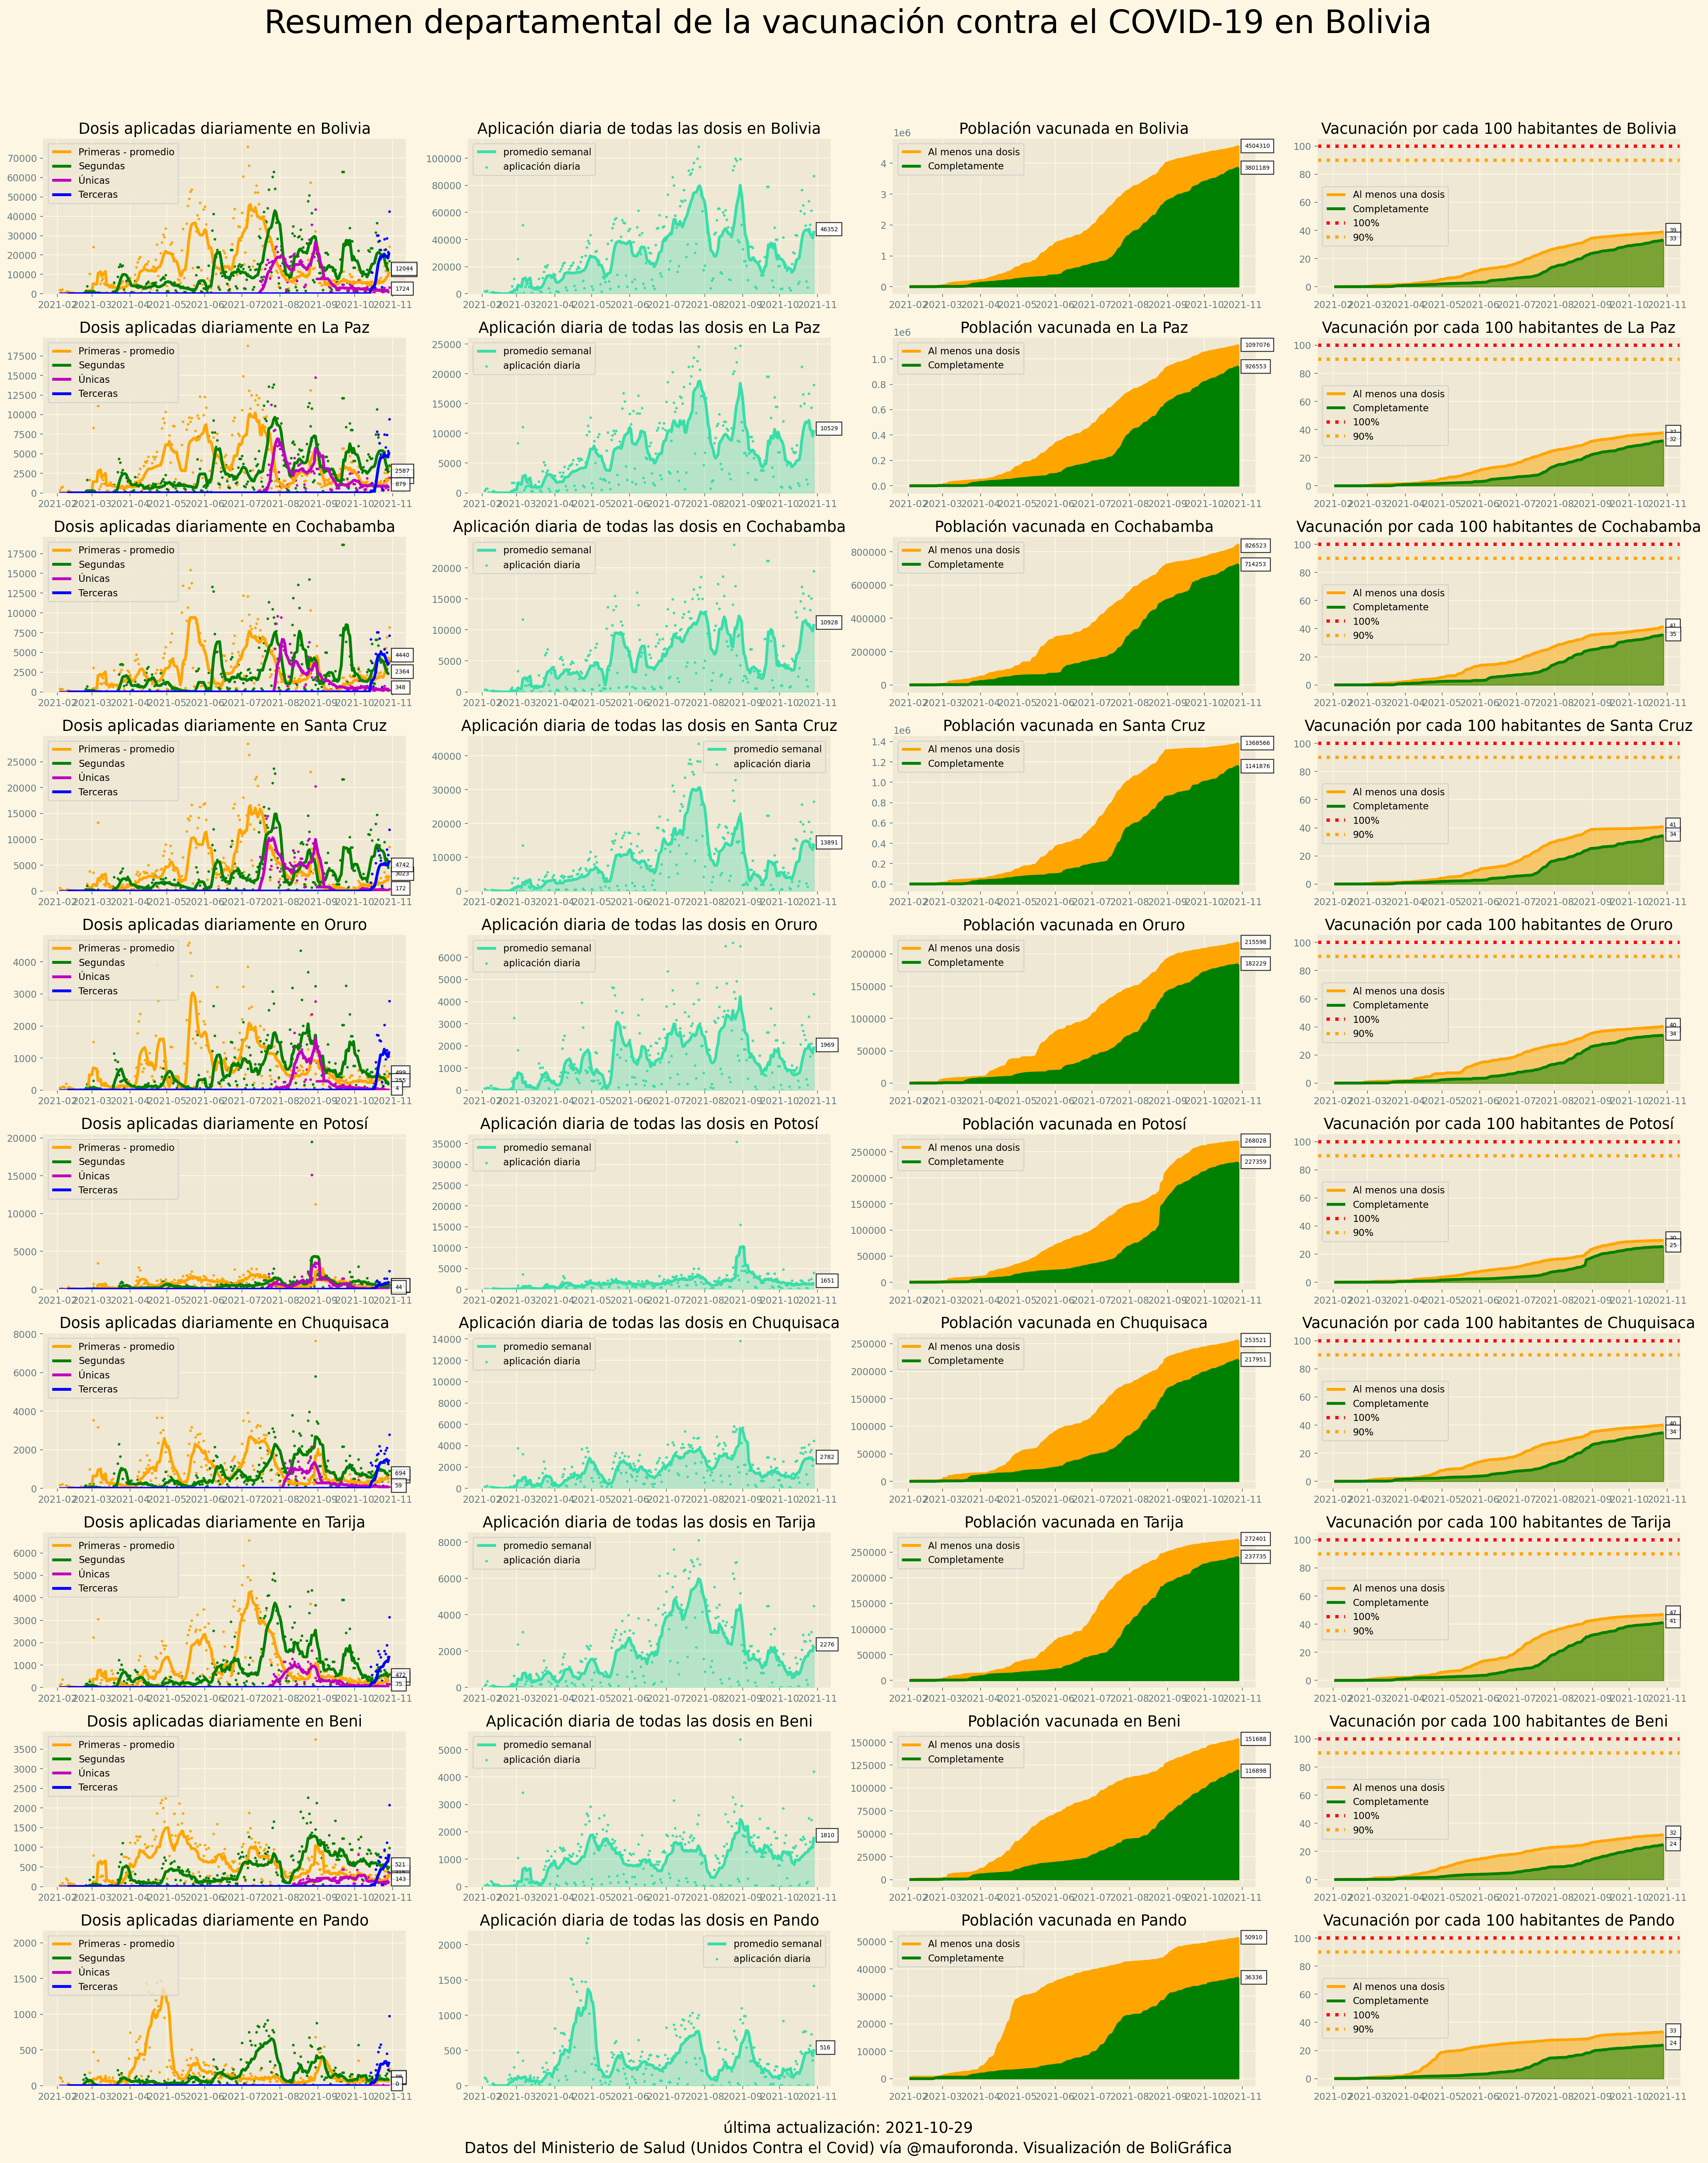

In [38]:
fig, axs = plt.subplots(10,4, figsize = (25,30),
                        dpi = 165
                        )
#axs = axs.flatten()
fig.suptitle("Resumen departamental de la vacunación contra el COVID-19 en Bolivia", y=1.03, fontsize = 34)
fig.text(0.5,-.01,horizontalalignment='center',s=ultima_actualizacion, fontsize=16)
fig.text(0.5,-.02,horizontalalignment='center',s=atribucion, fontsize=16)

# fig.set_facecolor(background_color1)



for i in range(10):
  #axs[i,0].grid(zorder=1)
  axs[i,0].set_title("Dosis aplicadas diariamente en {}".format(primeras_dia.columns[i]))
  axs[i,0].scatter(primeras_dia.index, primeras_dia.iloc[:,i], color = color_vac_parcial1, s=3, zorder=2)
  axs[i,0].plot(primeras_dia.index, primeras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_parcial2, label="Primeras - promedio", linewidth = 3, zorder=3)
  axs[i,0].scatter(segundas_dia_alt.index, segundas_dia_alt.iloc[:,i], color = color_vac_completa1, s=3, zorder=2)
  axs[i,0].plot(segundas_dia_alt.index, segundas_dia_alt.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_completa2, label="Segundas", linewidth = 3, zorder=3)  
  
  axs[i,0].scatter(unicas_dia.index, unicas_dia.iloc[:,i], color = color3, s=3, zorder=2)
  axs[i,0].plot(unicas_dia.index, unicas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color3, label="Únicas", linewidth = 3, zorder=3)  

  axs[i,0].scatter(terceras_dia.index, terceras_dia.iloc[:,i], color = color_terceras, s=3, zorder=2)
  axs[i,0].plot(terceras_dia.index, terceras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_terceras, label="Terceras", linewidth = 3, zorder=3)  
  
  axs[i,0].legend(loc="upper left")
  axs[i,0].legend(loc="upper left")
  annotate_last_nonflat(primeras_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_dia_alt.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(unicas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  axs[i,0].set_ylim(bottom=0)


for i in range(10):
 # axs[i,1].grid(zorder=1)
  axs[i,1].set_title("Aplicación diaria de todas las dosis en {}".format(primeras_dia.columns[i]))
  axs[i,1].scatter(ambas_dia.index, ambas_dia.iloc[:,i], color = color_total_dosis1, label="aplicación diaria", s=3, zorder=2)
  axs[i,1].plot(ambas_dia.index, ambas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_total_dosis2, label="promedio semanal", linewidth = 3, zorder=3)
  axs[i,1].fill_between(ambas_dia.index, ambas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_total_dosis2, zorder=3, alpha=.3)
  axs[i,1].legend()
  annotate_last_nonflat(ambas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,1), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  axs[i,1].set_ylim(bottom=0)



for i in range(10):
  #axs[i,2].grid(zorder=1)
  axs[i,2].set_title("Población vacunada en {}".format(primeras_dia.columns[i]))
  axs[i,2].plot(almenos_una_acum.iloc[:,i].interpolate(), label = "Al menos una dosis", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,2].fill_between(almenos_una_acum.index, almenos_una_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2)
  axs[i,2].plot(segundas_acum.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,2].fill_between(segundas_acum.index, segundas_acum.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3)
  axs[i,2].legend()
  annotate_last_nonflat(almenos_una_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

for i in range(10):
  #axs[i,3].grid(zorder=1)
  axs[i,3].set_title("Vacunación por cada 100 habitantes de {}".format(primeras_dia.columns[i]))
  axs[i,3].plot(almenos_una_pc_acum.iloc[:,i].interpolate(), label = "Al menos una dosis", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,3].fill_between(almenos_una_pc_acum.index, almenos_una_pc_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2, alpha=.5)
  axs[i,3].plot(segundas_acum_pc.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,3].fill_between(segundas_acum_pc.index, segundas_acum_pc.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3, alpha=.5)
  axs[i,3].axhline(y=100, color='red', linestyle='dotted',label="100%", linewidth=3.5)
  axs[i,3].axhline(y=90, color='orange', linestyle='dotted',label="90%", linewidth=3.5)
  axs[i,3].legend(loc= "center left")
  annotate_last_nonflat(almenos_una_pc_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum_pc.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

fig.tight_layout()

fig.savefig(directory + "resumen_detallado.jpg", bbox_inches="tight")

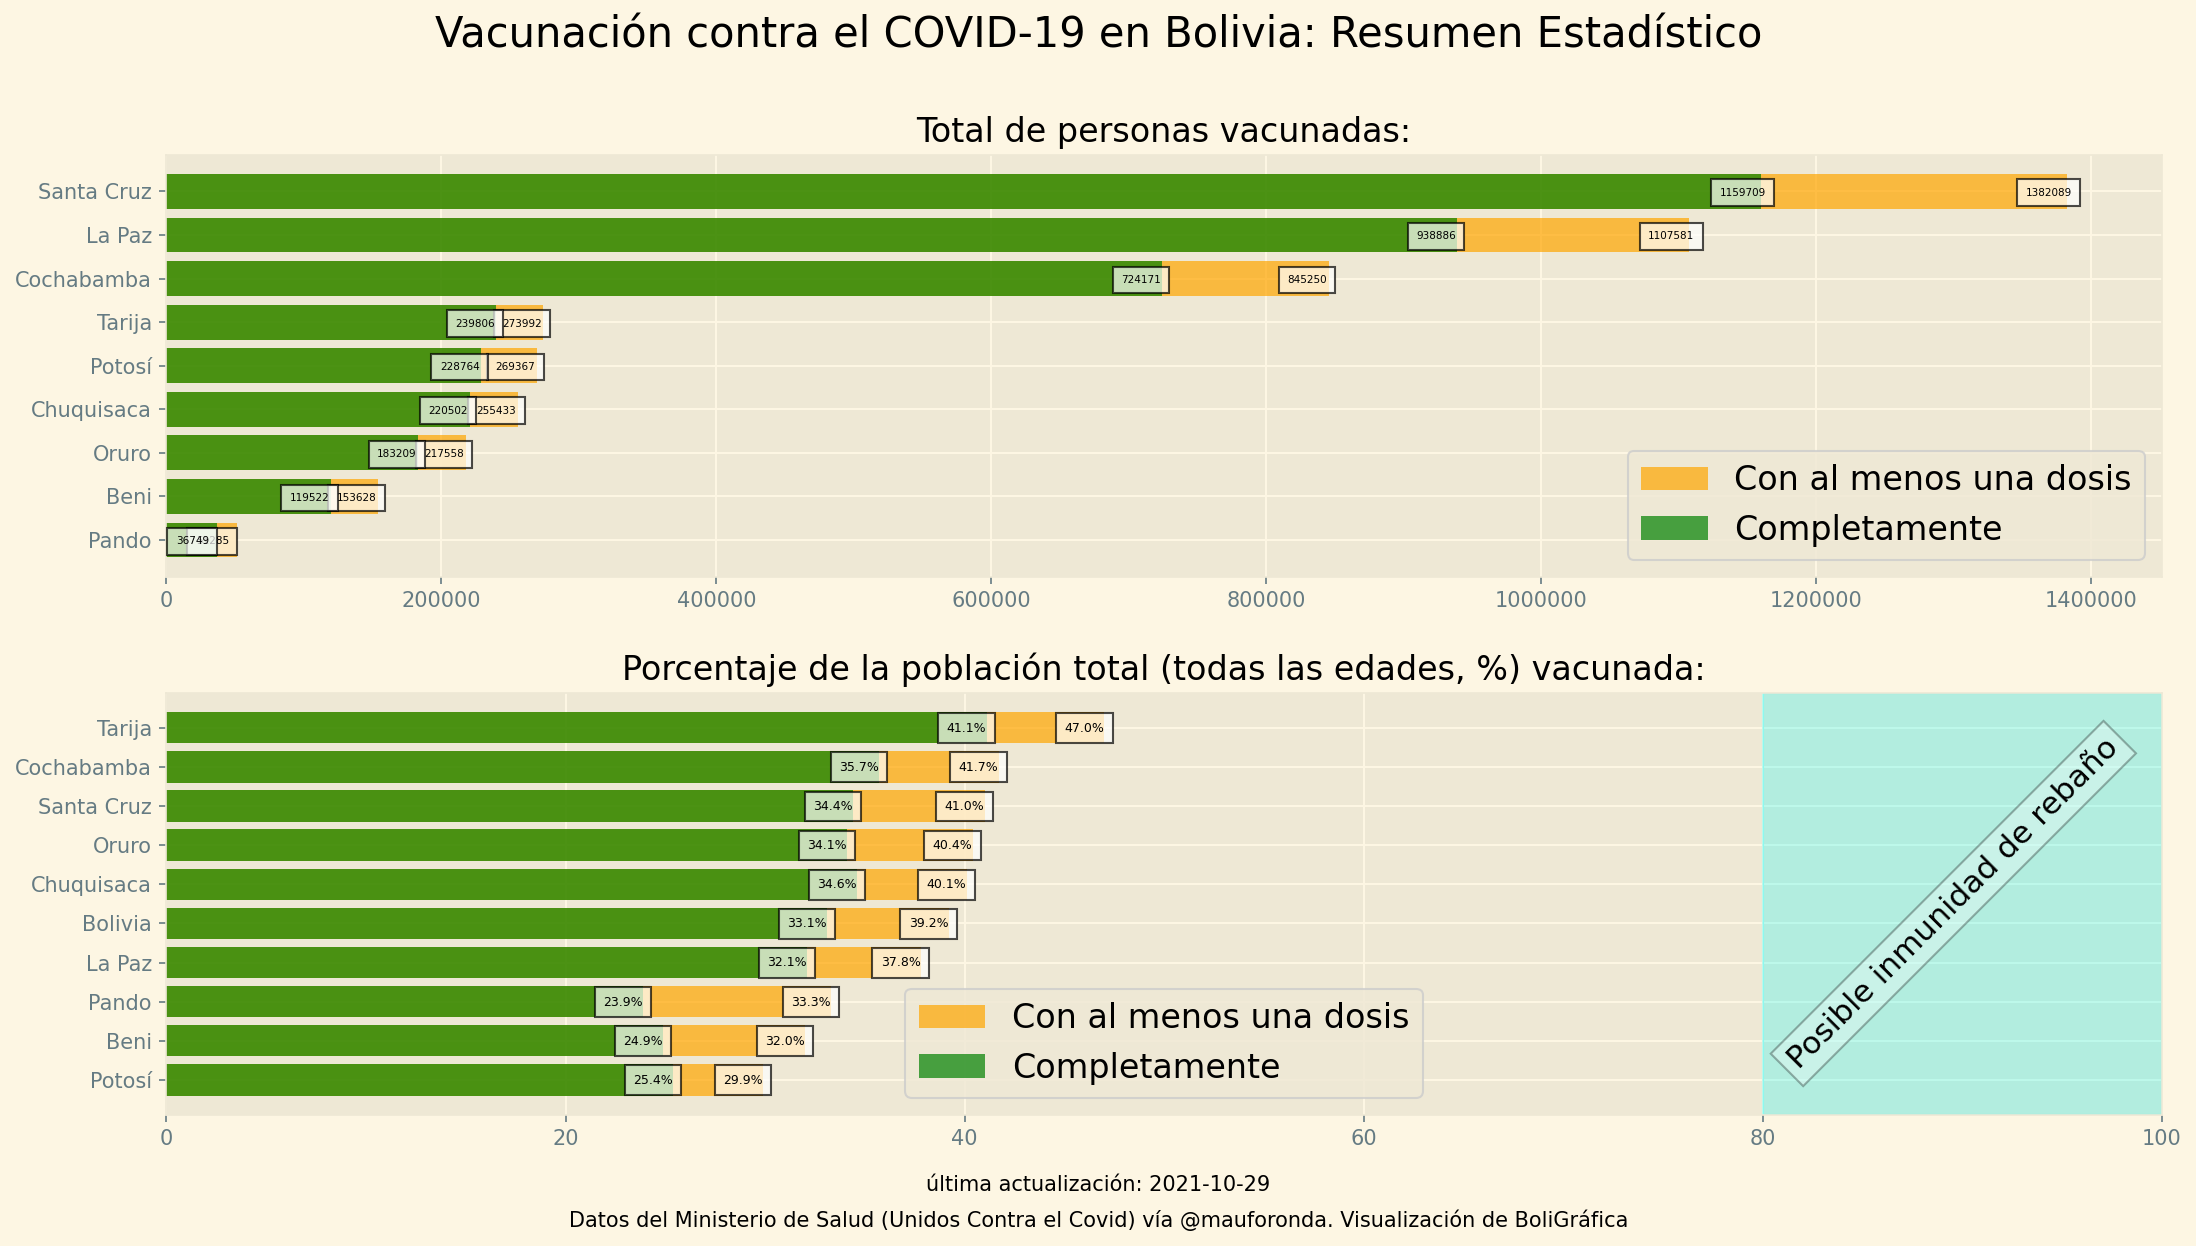

In [39]:
fig, axs = plt.subplots(2,1, figsize=(15,8),dpi=150)
axs=axs.flatten()

fig.suptitle("Vacunación contra el COVID-19 en Bolivia: Resumen Estadístico", fontsize=20)
fig.text(0.5,.0,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,-.03,horizontalalignment='center',s=atribucion, fontsize=10)

# fig.set_facecolor(background_color1)

sort_primeras = almenos_una_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
sort_segundas = segundas_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
axs[0].grid(zorder=1)
axs[0].set_title("Total de personas vacunadas:", fontsize=16)
bar1 = axs[0].barh(sort_primeras.index, sort_primeras, label="Con al menos una dosis", color=color_vac_parcial2, alpha=.7)
axs[0].barh(sort_segundas.index, sort_segundas, label="Completamente", color=color_vac_completa2, alpha=.7)
axs[0].legend(fontsize=16)
axs[0].get_xaxis().get_major_formatter().set_scientific(False)
annotate_bar(bar1,0, fontsize=5, y_offset=.3, x_offset=-30000, alpha=.7)



sort_primeras = almenos_una_pc_acum.iloc[-1,:].sort_values(ascending=True).round(1)
sort_segundas = segundas_acum_pc.iloc[-1,:].sort_values(ascending=True).round(1)
axs[1].grid(zorder=1)
axs[1].set_title("Porcentaje de la población total (todas las edades, %) vacunada:", fontsize=16)
axs[1].barh(sort_primeras.index, sort_primeras, label="Con al menos una dosis", color=color_vac_parcial2, alpha=.7)
axs[1].barh(sort_segundas.index, sort_segundas, label="Completamente", color=color_vac_completa2, alpha=.7)
axs[1].legend(fontsize=16)
axs[1].set_xlim(0,100)
annotate_bar(sort_primeras,1, fontsize=6, y_offset=.3, x_offset=-2, alpha=.7, end_text="%")
axs[1].axvspan(xmin=80, xmax=100, color="cyan", alpha=.25)
axs[1].annotate("Posible inmunidad de rebaño",
               xy=(81,0.3), rotation=45, fontsize=15, bbox={"facecolor":"w", "alpha":.3})

fig.tight_layout(pad=2)
fig.savefig(directory + "resumen_departamental.jpg", bbox_inches="tight")

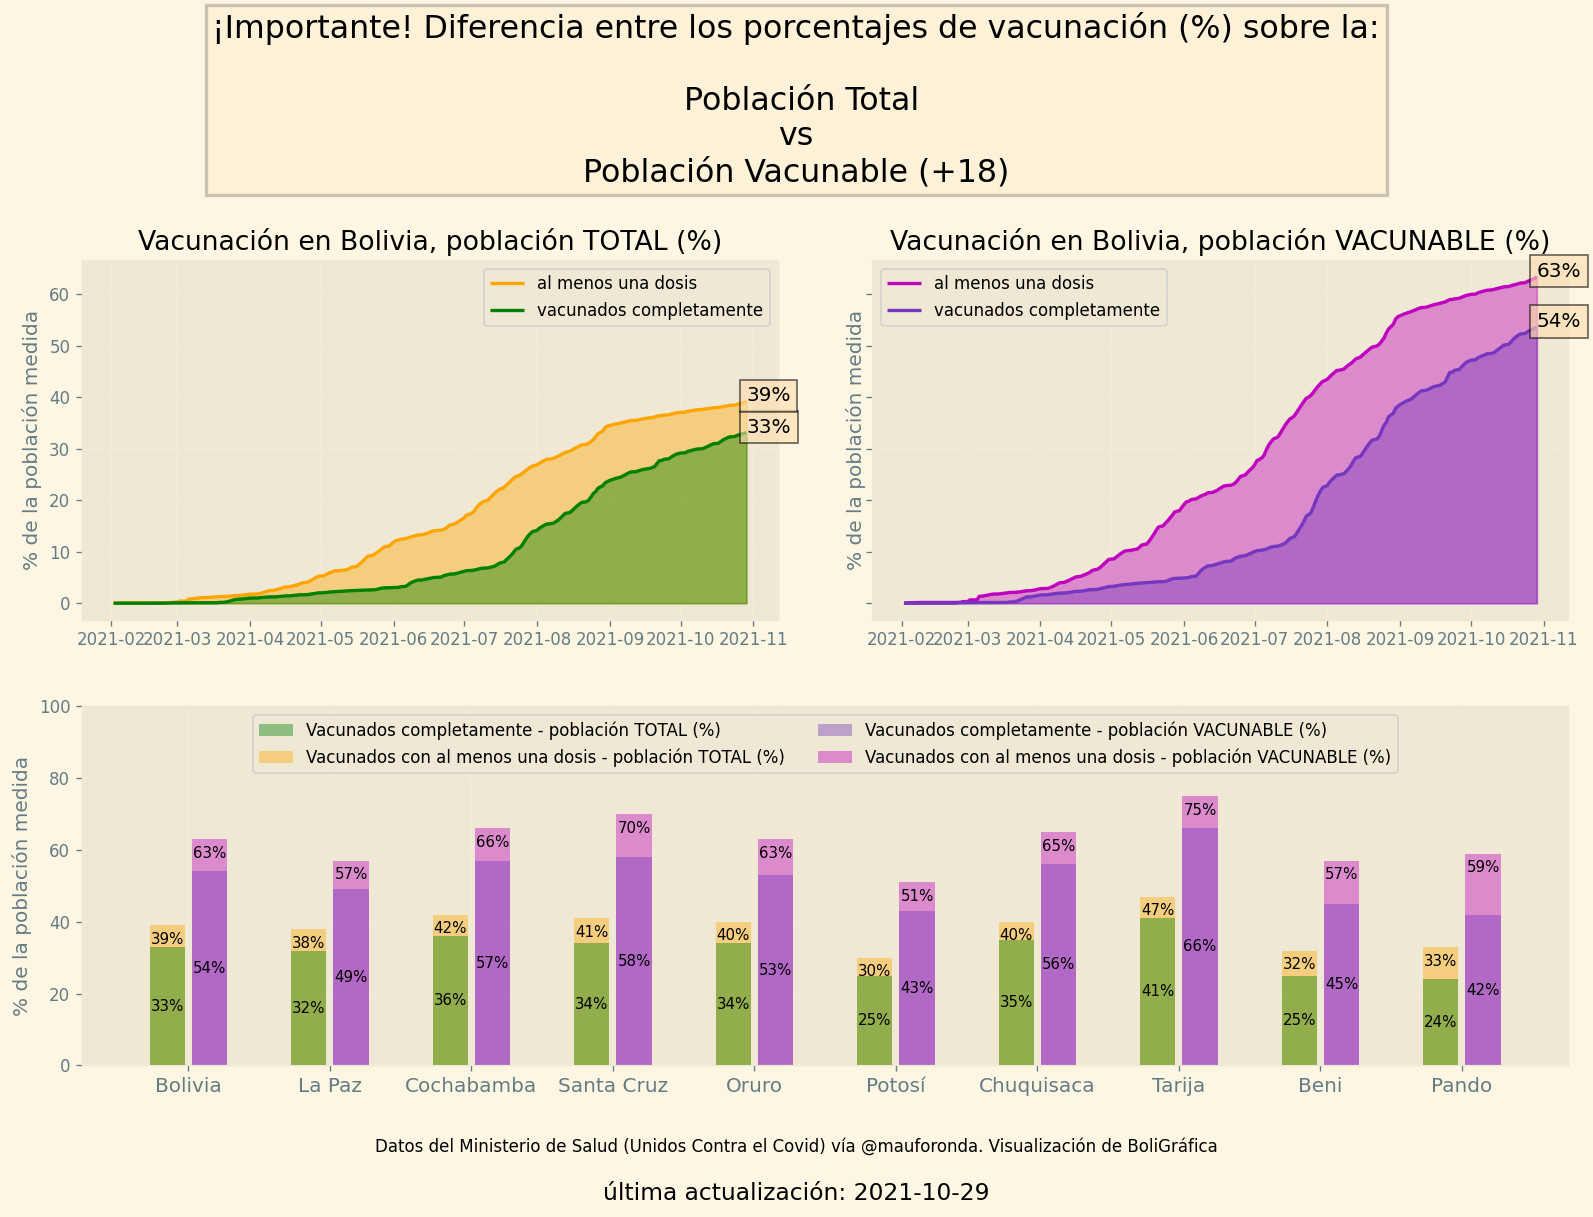

In [40]:
fig, axs = plt.subplots(2,2,figsize=(14,10), sharey=True, dpi=120)
axs = axs.flatten()

fig.suptitle("¡Importante! Diferencia entre los porcentajes de vacunación (%) sobre la:\n\n Población Total\nvs\nPoblación Vacunable (+18)", fontsize=19, y=.95,
    bbox={"facecolor":"navajowhite", "alpha":.2, "edgecolor":"black",'linewidth': 2})

axs[0].set_title("Vacunación en Bolivia, población TOTAL (%)")
axs[0].grid(alpha=.2)
axs[0].plot(almenos_una_pc_acum.Bolivia, label="al menos una dosis", color=color_vac_parcial2)
axs[0].plot(completa_pc_acum.Bolivia, label="vacunados completamente", color = color_vac_completa2)
axs[0].fill_between(almenos_una_pc_acum.index, almenos_una_pc_acum.Bolivia, color=color_vac_parcial2, alpha=.4)
axs[0].fill_between(completa_pc_acum.index, completa_pc_acum.Bolivia, color = color_vac_completa2, alpha=.4,)
axs[0].set_ylabel("% de la población medida")
axs[0].legend()

axs[1].set_title("Vacunación en Bolivia, población VACUNABLE (%)")
axs[1].grid(alpha=.2)
axs[1].plot(almenos_una_vacunable_acum.Bolivia, label="al menos una dosis", color = color3)
axs[1].plot(completa_vacunable_acum.Bolivia, label="vacunados completamente", color = color4)
axs[1].fill_between(almenos_una_vacunable_acum.index, almenos_una_vacunable_acum.Bolivia, color = color3, alpha=.4,)
axs[1].fill_between(completa_vacunable_acum.index, completa_vacunable_acum.Bolivia, color = color4, alpha=.4,)
axs[1].set_ylabel("% de la población medida")
axs[1].legend()

axs[2].get_xaxis().set_visible(False)
axs[3].get_xaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)
axs[3].get_yaxis().set_visible(False)


x=list(range(10))
width=.25
b=.15
x1 = [i + b for i in x]
x2 = [i - b  for i in x]

axs[3] = fig.add_subplot(212)
axs[3].set_title("", fontsize=18)
axs[3].grid(alpha=.2)

# sorted = almenos_una_pc_acum.iloc[-1,:].sort_values(ascending=False)
# emptybar = axs[3].bar(sorted, [0,0,0,0,0,0,0,0,0,0])
bar1 = axs[3].bar(x2,completa_pc_acum.iloc[-1,:].round(0).astype(int), alpha=.4, width = width, label="Vacunados completamente - población TOTAL (%)", zorder=3, color=color_vac_completa2)
bar2 = axs[3].bar(x2,almenos_una_pc_acum.iloc[-1,:].round(0).astype(int), alpha=.4,width = width, label="Vacunados con al menos una dosis - población TOTAL (%)", zorder=2, color=color_vac_parcial2)
bar3 = axs[3].bar(x1,completa_vacunable_acum.iloc[-1,:].round(0).astype(int), alpha=.4,width = width, label="Vacunados completamente - población VACUNABLE (%)", zorder=3, color = color4)
bar4 = axs[3].bar(x1,almenos_una_vacunable_acum.iloc[-1,:].round(0).astype(int), alpha=.4,width = width, label="Vacunados con al menos una dosis - población VACUNABLE (%)", zorder=2, color = color3)

annotate_last_flat(completa_pc_acum,0, end_text="%", alpha=.6, facecolor="navajowhite")
annotate_last_flat(almenos_una_pc_acum,0, end_text="%", alpha=.6, facecolor="navajowhite")
annotate_last_flat(completa_vacunable_acum,0, axis=1, end_text="%", alpha=.6, facecolor="navajowhite")
annotate_last_flat(almenos_una_vacunable_acum,0, axis=1, end_text="%", alpha=.6, facecolor="navajowhite")

axs[3].bar_label(bar1, color="black", label_type="center", fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar2, color="black", padding=-13, fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar3, color="black", label_type="center", fontsize=9, fmt='%.0f%%')
axs[3].bar_label(bar4, color="black", padding=-13, fontsize=9, fmt='%.0f%%')


axs[3].set_xticks(x)
axs[3].set_xticklabels(completa_pc_acum.columns, fontsize=12)
axs[3].set_ylim(0,100)
axs[3].set_ylabel("% de la población medida")
axs[3].legend(loc = "upper center", ncol=2)

fig.text(0.5,-.04,horizontalalignment='center',s=ultima_actualizacion, fontsize=14)
fig.text(0.5,0.0,horizontalalignment='center',s=atribucion, fontsize=10)

fig.tight_layout(pad=3)

fig.savefig(directory + "total_vs_vacunable.jpg", bbox_inches="tight")

Text(0.14, 0.115, 'BoliGráfica')

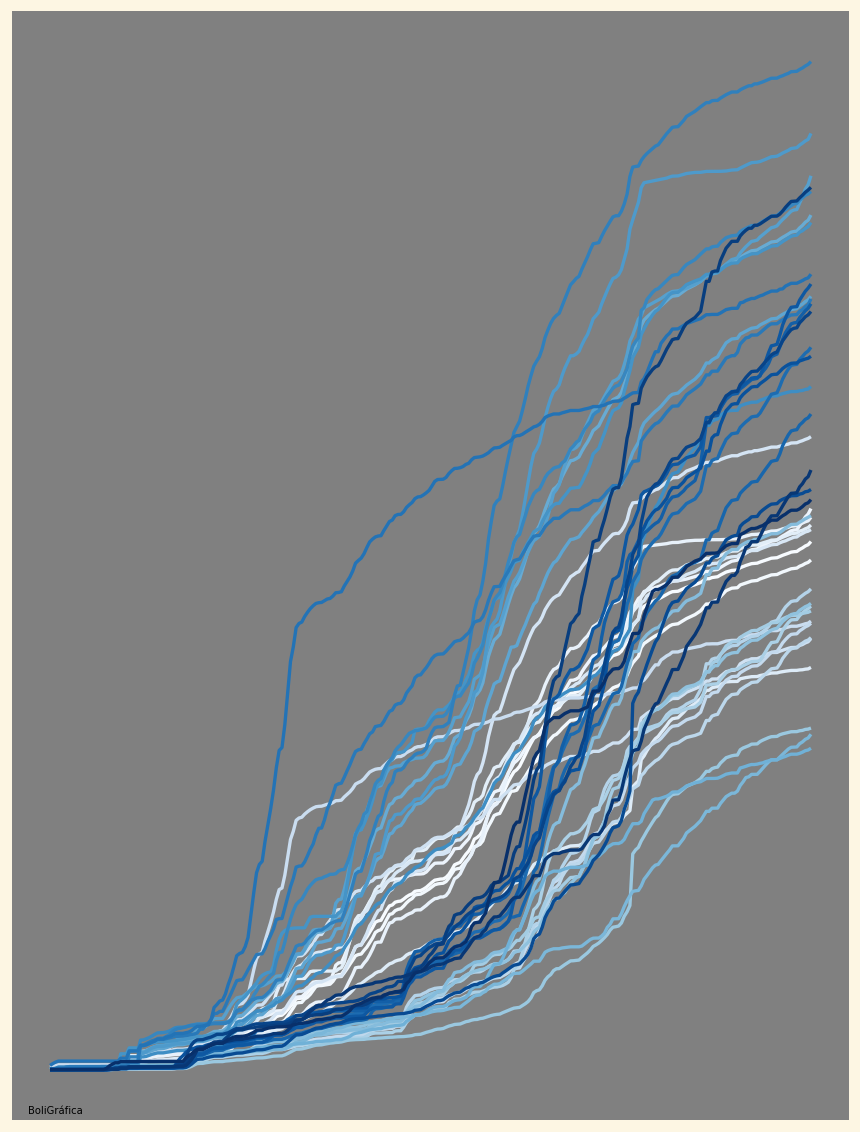

In [41]:
fig, axs = plt.subplots(1,1,figsize=(9,12), dpi=120)
axs.set_facecolor("grey")

blues = plt.get_cmap("Blues", 4*10)(range(40*10))
axs.plot(almenos_una_pc_acum, label="al menos una dosis", color="g")
axs.plot(completa_pc_acum, label="vacunados completamente", color = color_vac_completa2)
axs.plot(almenos_una_vacunable_acum, label="al menos una dosis", color = color3)
axs.plot(completa_vacunable_acum, label="vacunados completamente", color = color4)


axs.spines['top'].set_visible(False)
axs.spines['bottom'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.get_yaxis().set_visible(False)
axs.get_xaxis().set_visible(False)

for i in range(len(axs.lines)):
    axs.lines[i].set_color(blues[i])
fig.text(0.14,.115,s="BoliGráfica", fontsize=6)

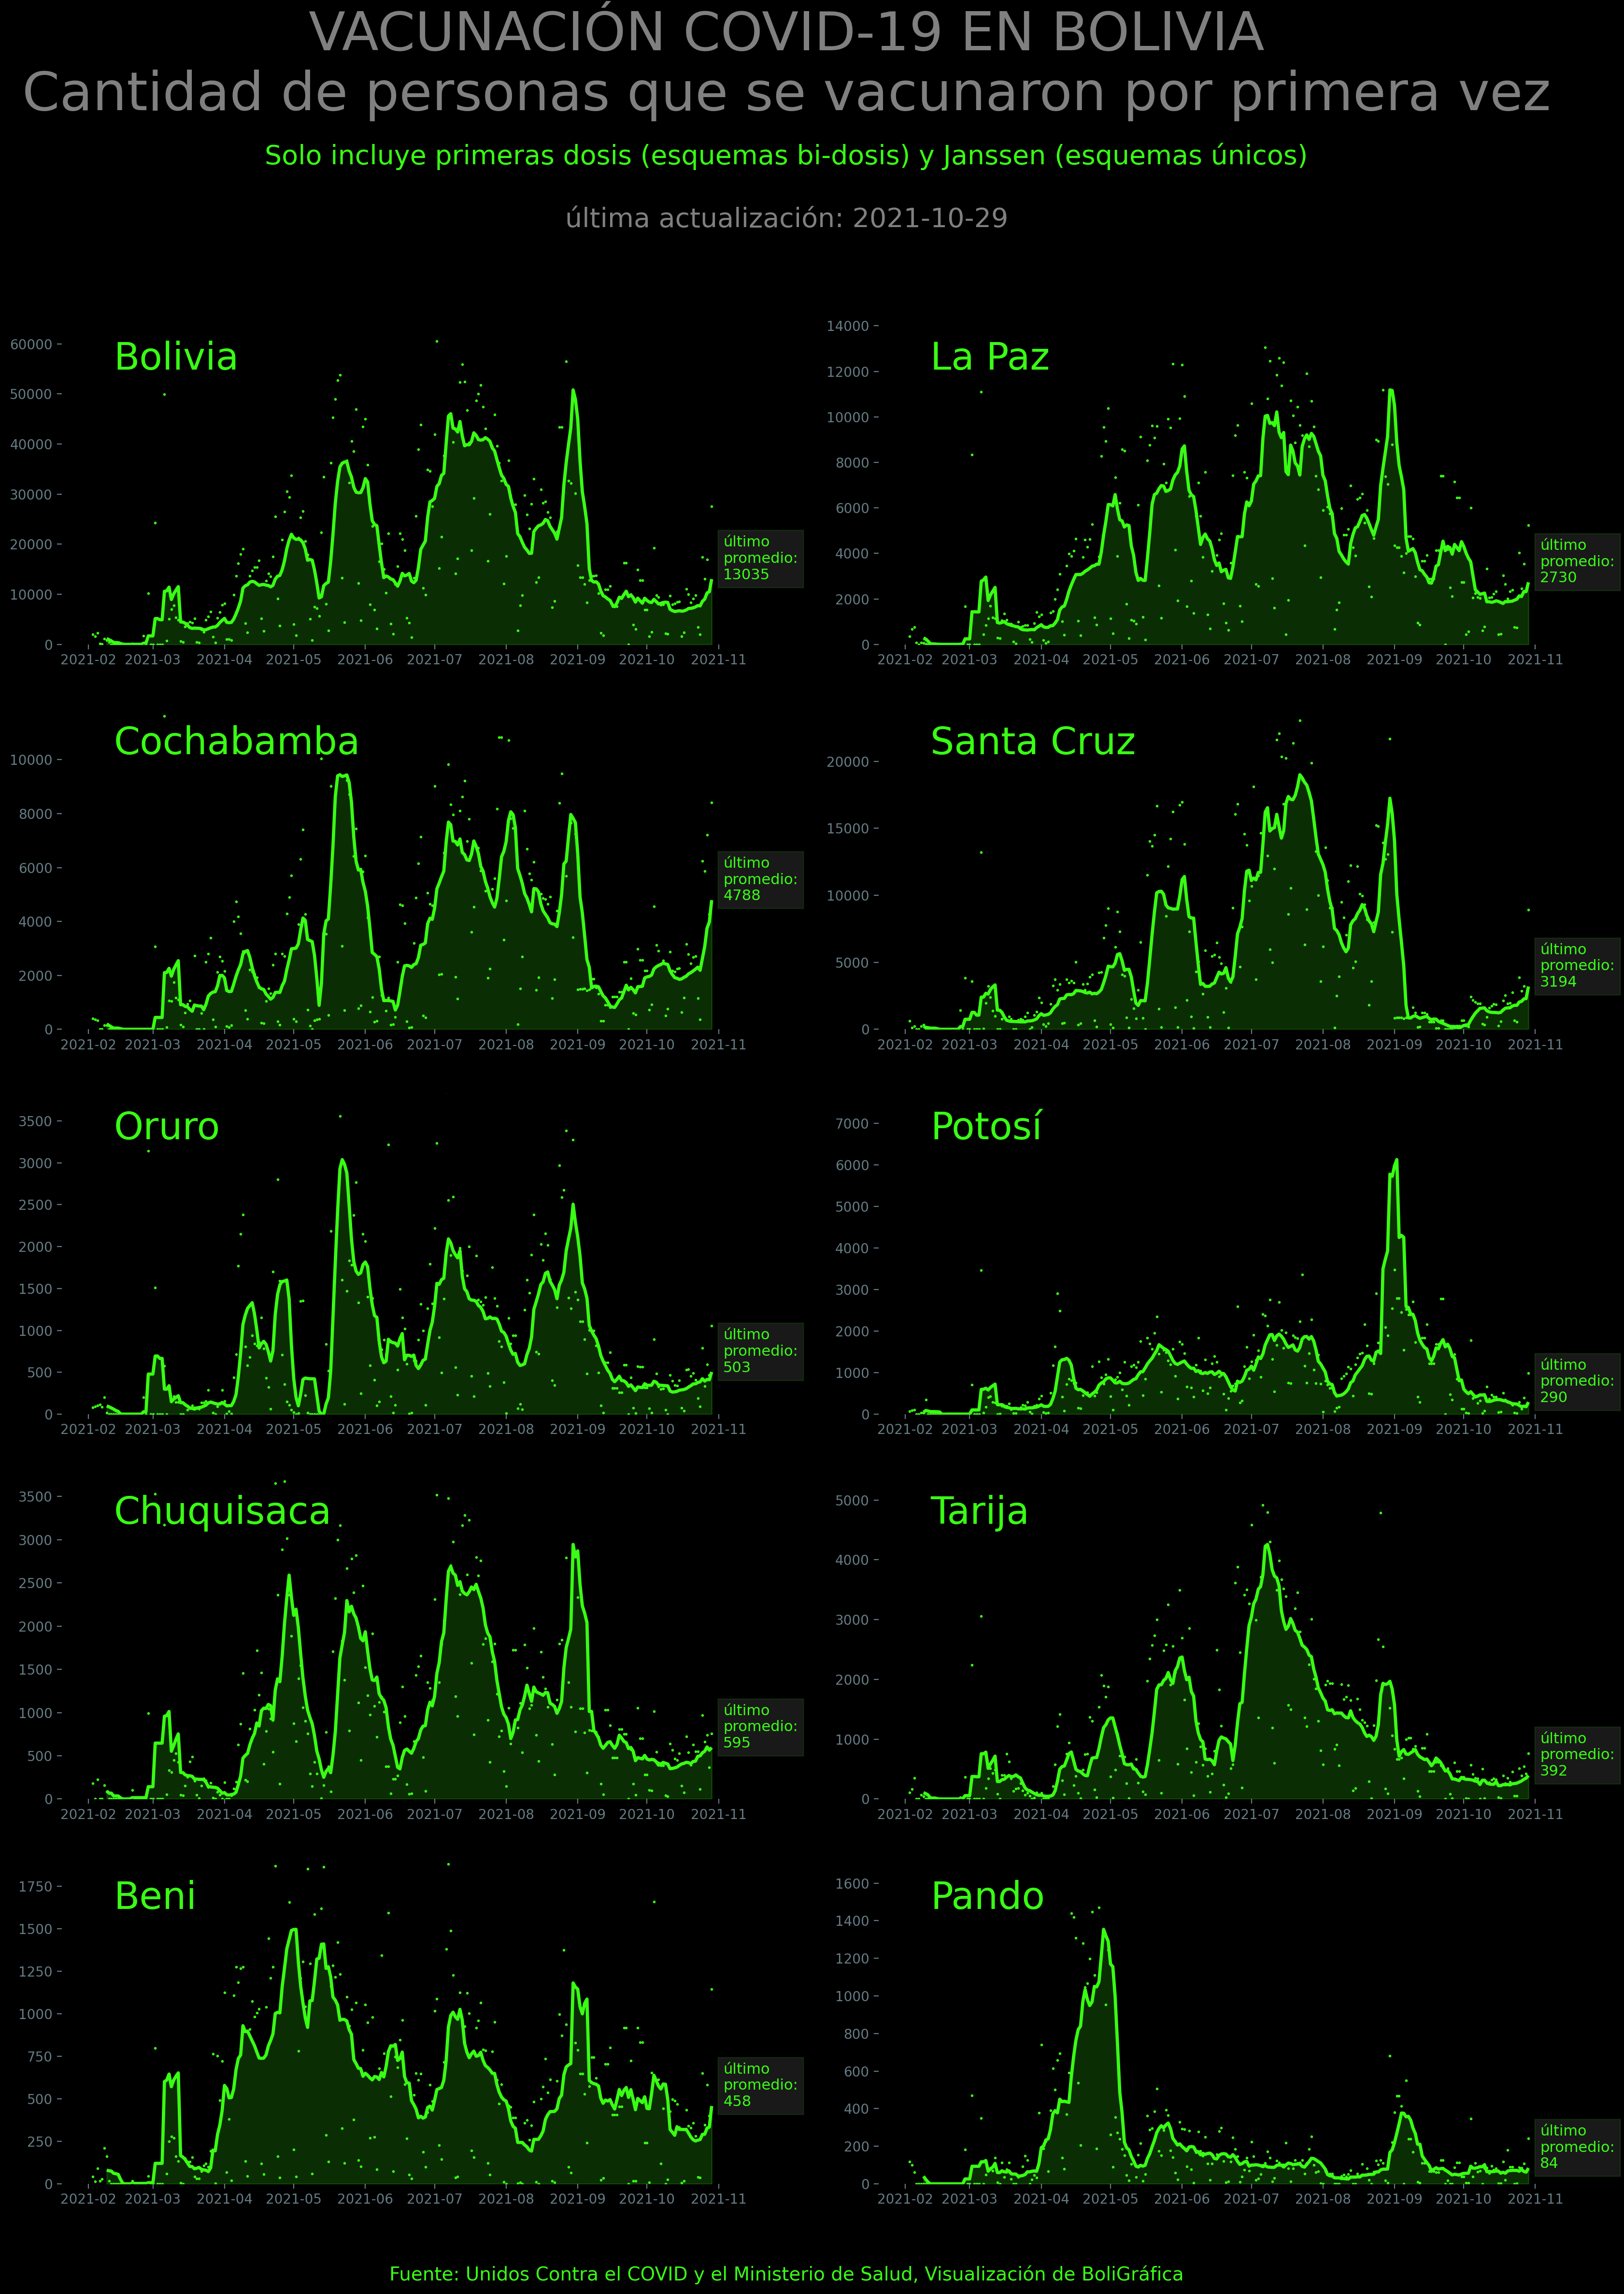

In [42]:
fig, axs = plt.subplots(5,2,figsize=(20,25), dpi=200)
axs = axs.flatten()

fig.suptitle("VACUNACIÓN COVID-19 EN BOLIVIA\nCantidad de personas que se vacunaron por primera vez", fontsize=40, y = 1.01, color="gray")
fig.text(s="Solo incluye primeras dosis (esquemas bi-dosis) y Janssen (esquemas únicos)",
         x=.5,y=.946, ha="center",
         fontsize=20, color="#39FF14")
fig.text(s=ultima_actualizacion,
         x=.5,y=.92, ha="center",
         fontsize=20, color="gray")
fig.text(s="Fuente: Unidos Contra el COVID y el Ministerio de Salud, Visualización de BoliGráfica",
         x=.5, y=0.07, ha="center", fontsize=14, color="#39FF14")

fig.set_facecolor("black")

start = 0

for i in range(10):
    axs[i].set_facecolor("black")
    axs[i].grid(color="black")

    axs[i].scatter(almenos_una_dia.index[start:],almenos_una_dia.iloc[start:,i], color="#39FF14", s=1)
    axs[i].plot(almenos_una_dia.index[start:],almenos_una_dia.iloc[start:,i].rolling(7).mean(), color="#39FF14", linewidth=2.4)
    axs[i].fill_between(almenos_una_dia.index[start:],almenos_una_dia.iloc[start:,i].rolling(7).mean(), color="#39FF14", alpha=.18)
    axs[i].text(s=almenos_una_dia.columns[i],
               x=almenos_una_dia.index[start+ 10] ,y=almenos_una_dia.iloc[start:,i].rolling(7).mean().max()*1.08, color="#39FF14", fontsize=28)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    annotate_last_nonflat(almenos_una_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=i, start_text="último\npromedio:\n", text_color="#39FF14", fontsize=11, offset_days=5, edgecolor="#39FF14", facecolor="white", alpha=0.1)


    
    axs[i].set_ylim(0, almenos_una_dia.iloc[start:,i].rolling(7).mean().max()*1.26)
    
fig.savefig(directory + "primera_vacunacion.jpg", bbox_inches="tight")